### Case Study : Telecom Churn Case Study

#### Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.o reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

#### Business Goal: 

Here we have to analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
#Importing necessary libraries and packages 
import pandas as pd
import numpy as np
import warnings

from scipy import special 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import math
from IPython.display import Markdown, display ,HTML


from sklearn.model_selection import train_test_split


sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1) # make sure data and columns are displayed correctly withput purge
pd.options.display.float_format = '{:20,.2f}'.format # display float value with correct precision 


warnings.filterwarnings('ignore')

<ipython-input-1-1ab92ec31af4>:19: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1) # make sure data and columns are displayed correctly withput purge


In [4]:
#Defining user defined function for future use through the analysis - 

#UDF to print required strings
def log(string):
    display(Markdown("> <span style='color:blue'>"+string+"</span>"))

#UDF for prinitng Headers    
def header(string):
    display(Markdown("------ "))
    display(Markdown("### "+string))
    
#UDF for formatting the Headers 
def header_red(string):
    display(Markdown("> <span style='color:red'>"+string))   

#UDF for getting data type   
def get_variable_type(element) :
    """
     Check if columna are Continuous or Categorical variable.
     Assumption is that if
                 unique count < 20 then categorical 
                 unique count >= 20 and dtype = [int64 or float64] then continuous
     """
    if element==0:
        return "Not Known"
    elif element < 20 and element!=0 :
        return "Categorical"
    elif element >= 20 and element!=0 :
        return "Continuous" 

#UDF to get description of dataframe
def get_meta_data(dataframe) :
    """
     Method to get Meta-Data about any dataframe passed 
    """
    metadata_matrix = pd.DataFrame({
                    'Datatype' : dataframe.dtypes.astype(str), 
                    'Non_Null_Count': dataframe.count(axis = 0).astype(int), 
                    'Null_Count': dataframe.isnull().sum().astype(int), 
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100, 
                    'Unique_Values_Count': dataframe.nunique().astype(int) 
                     })
    
    metadata_matrix = predict_variable_type(metadata_matrix)
    return metadata_matrix

#UDF to get columns with singular unique value in a dataframe
def display_columns_with_1_unique_value(dataframe):
    unique_values_count_1 = dataframe[dataframe["Unique_Values_Count"] == 1]
    drop_value_col = unique_values_count_1.index.tolist()
    lenght = len(drop_value_col)
    header("Columns with only one unique value : "+str(lenght))
    if lenght == 0 :
        header_red("No columns with only one unique values.")  
    else :    
        log("Columns with only one unique value :")
        for index,item in enumerate(drop_value_col) :
            print(index,".",item)
    
    
def predict_variable_type(metadata_matrix):
    metadata_matrix["Variable_Type"] = metadata_matrix["Unique_Values_Count"].apply(get_variable_type).astype(str)
    metadata_matrix["frequency"] = metadata_matrix["Null_Count"] - metadata_matrix["Null_Count"]
    metadata_matrix["frequency"].astype(int)
    return metadata_matrix 


def list_potential_categorical_type(dataframe,main) :
    header("Stats for potential Categorical datatype columns")
    metadata_matrix_categorical = dataframe[dataframe["Variable_Type"] == "Categorical"]
    length = len(metadata_matrix_categorical)
    if length == 0 :
        header_red("No Categorical columns in given dataset.")  
    else :    
        metadata_matrix_categorical = metadata_matrix_categorical.filter(["Datatype","Unique_Values_Count"])
        metadata_matrix_categorical.sort_values(["Unique_Values_Count"], axis=0,ascending=False, inplace=True)
        col_to_check = metadata_matrix_categorical.index.tolist()
        name_list = []
        values_list = []
        for name in col_to_check :
            name_list.append(name)
            values_list.append(main[name].unique())
        temp = pd.DataFrame({"index":name_list,"Unique_Values":values_list})
        metadata_matrix_categorical = metadata_matrix_categorical.reset_index()
        metadata_matrix_categorical = pd.merge(metadata_matrix_categorical,temp,how='inner',on='index')
        display(metadata_matrix_categorical.set_index("index")) 

def plot_data_type_pie_chat(dataframe) : 
        header("Stats for Datatype Percentage Distribution")
        dataframe_group = dataframe.groupby("Datatype").frequency.count().reset_index()
        dataframe_group.sort_values(["Datatype"], axis=0,ascending=False, inplace=True)
        trace = go.Pie(labels=dataframe_group["Datatype"].tolist(), values=dataframe_group["frequency"].tolist())
        layout = go.Layout(title="Datatype Percentage Distribution")
        fig = go.Figure(data=[trace], layout=layout)    
        py.offline.iplot(fig)
    
def get_potential_categorical_type(dataframe,main,unique_count) :
    metadata_matrix_categorical = dataframe[dataframe["Variable_Type"] == "Categorical"]
    metadata_matrix_categorical = dataframe[dataframe["Unique_Values_Count"] == unique_count]
    length = len(metadata_matrix_categorical)
    if length == 0 :
        header_red("No Categorical columns in given dataset.")  
    else :    
        metadata_matrix_categorical = metadata_matrix_categorical.filter(["Datatype","Unique_Values_Count"])
        metadata_matrix_categorical.sort_values(["Unique_Values_Count"], axis=0,ascending=False, inplace=True)
        col_to_check = metadata_matrix_categorical.index.tolist()
        name_list = []
        values_list = []
        for name in col_to_check :
            name_list.append(name)
            values_list.append(main[name].unique())
        temp = pd.DataFrame({"index":name_list,"Unique_Values":values_list})
        metadata_matrix_categorical = metadata_matrix_categorical.reset_index()
        metadata_matrix_categorical = pd.merge(metadata_matrix_categorical,temp,how='inner',on='index')
        display(metadata_matrix_categorical.set_index("index")) 
           
def color_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for value 
    greater than 10 , black otherwise.
    """
    color = 'red' if val > 5 else 'black'
    return 'color: %s' % color

def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

In [5]:
#Reading the source dataset into a dataframe for further analysis - 

base_df = pd.read_csv('telecom_churn_data.csv')
base_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,252.00,252.00,252.00,NaN,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.00,0.00,0.00,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.00,1.00,1.00,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,...,NaN,NaN,154.00,50.00,NaN,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.00,0.00,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.00,1.00,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,...,0.00,NaN,NaN,NaN,46.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.00,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,251.10,508.05,389.50,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.00,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,309.88,238.17,163.43,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.00,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,...,NaN,56.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00


##### Business Assumptions to be considered for analysis - 
In churn prediction, we assume that there are three phases of customer lifecycle :

- The ‘good’ phase [Month 6 & 7]
- The ‘action’ phase [Month 8]
- The ‘churn’ phase [Month 9]

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase

### Part 1: Data Preparation 

#### Step 1: Interpreting New Features - 

In [6]:
# Extracting list of columns containing recharge amount
amt_recharge_columns =  base_df.columns[base_df.columns.str.contains('rech_amt|rech_data')]
print(amt_recharge_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


**From above features we will be able to derive more meaningful information related to recharge amount:**

- Total recharge amount
- Total recharge for data
- Maximum recharge amount
- Last date of Recharging the data
- Average recharge amount for data
- Maximum recharge for data

In [7]:
# Checking missing values percentages in the dataframe with Recharge Amt related features - 

base_df_null_check = 100*base_df.loc[:,amt_recharge_columns].isnull().sum()/len(base_df)
df = pd.DataFrame(base_df_null_check)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df = pd.DataFrame(df.Null_Percentage).style.applymap(color_red)
display(df)

,Null_Percentage
total_rech_amt_6,0.000000
total_rech_amt_7,0.000000
total_rech_amt_8,0.000000
total_rech_amt_9,0.000000
max_rech_amt_6,0.000000
max_rech_amt_7,0.000000
max_rech_amt_8,0.000000
max_rech_amt_9,0.000000
date_of_last_rech_data_6,74.846748
date_of_last_rech_data_7,74.428744


##### **As observed, 74% values related to recharge are missing from the data**

In [8]:
#Statistically describing the amount recharge columns - 
base_df.loc[:, amt_recharge_columns].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,"99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","25,153.00","25,571.00","26,339.00","25,922.00","25,153.00","25,571.00","26,339.00","25,922.00","25,153.00","25,571.00","26,339.00","25,922.00"
mean,327.51,322.96,324.16,303.35,104.64,104.75,107.73,101.94,2.46,2.67,2.65,2.44,126.39,126.73,125.72,124.94,192.60,200.98,197.53,192.73
std,398.02,408.11,416.54,404.59,120.61,124.52,126.90,125.38,2.79,3.03,3.07,2.52,108.48,109.77,109.44,111.36,192.65,196.79,191.30,188.40
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.50,0.50,1.00
25%,109.00,100.00,90.00,52.00,30.00,30.00,30.00,28.00,1.00,1.00,1.00,1.00,25.00,25.00,25.00,25.00,82.00,92.00,87.00,69.00
50%,230.00,220.00,225.00,200.00,110.00,110.00,98.00,61.00,1.00,1.00,1.00,2.00,145.00,145.00,145.00,145.00,154.00,154.00,154.00,164.00
75%,437.50,428.00,434.50,415.00,120.00,128.00,144.00,144.00,3.00,3.00,3.00,3.00,177.00,177.00,179.00,179.00,252.00,252.00,252.00,252.00
max,"35,190.00","40,335.00","45,320.00","37,235.00","4,010.00","4,010.00","4,449.00","3,399.00",61.00,54.00,60.00,84.00,"1,555.00","1,555.00","1,555.00","1,555.00","7,546.00","4,365.00","4,076.00","4,061.00"


##### **Observations of Recharge Amount Columns:**
- The minimum value is 1, we can impute the NA values with 0 to signify that no recharge was done

- Also, we can create a new attribute to understand the amount spent by users on data recharge by using existing attributes - **total_rech_data** and **av_rech_amt_data**

In [9]:
#Replacing NaN values with 0 in the total recharge columns - 
#As observed this imputation is performed only for the months before 'churn phase'

base_df['total_rech_data_6'] = base_df['total_rech_data_6'].replace(np.NaN,0.0)
base_df['total_rech_data_7'] = base_df['total_rech_data_7'].replace(np.NaN,0.0)
base_df['total_rech_data_8'] = base_df['total_rech_data_8'].replace(np.NaN,0.0)

In [10]:
#Replacing NaN values with 0 in avg recharge amount columns - 

base_df['av_rech_amt_data_6'] = base_df['av_rech_amt_data_6'].replace(np.NaN,0.0)
base_df['av_rech_amt_data_7'] = base_df['av_rech_amt_data_7'].replace(np.NaN,0.0)
base_df['av_rech_amt_data_8'] = base_df['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [11]:
# Adding new column total recharge amount for data: total_rech_amt_data for the process of identifying High Value customer- 

base_df['total_rech_amt_data_6'] = base_df.av_rech_amt_data_6 * base_df.total_rech_data_6
base_df['total_rech_amt_data_7'] = base_df.av_rech_amt_data_7 * base_df.total_rech_data_7
base_df['total_rech_amt_data_8'] = base_df.av_rech_amt_data_8 * base_df.total_rech_data_8

### Data Preparation 

### Step 2: Filtering high value customers 

##### Defining total average recharge amount for good phase i.e 6th & 7th Months to filter High Value Customers - 

In [12]:
base_df['total_avg_rech_amnt_6_7_GPhase'] = (base_df.total_rech_amt_6 + base_df.total_rech_amt_data_6 \
                                               + base_df.total_rech_amt_7+ base_df.total_rech_amt_data_7)/2

##### Filtering High value customers: 

- Those who have recharged with an amount more than or equal to X, where X is greater than 70th percentile of the **average recharge amount in the first two months (the good phase)**


In [13]:
# creating a filter for values greater than 70th percentile of total average recharge amount for good phase 

high_value_filter = base_df.total_avg_rech_amnt_6_7_GPhase.quantile(0.7)

log('70 percentile of 6th and 7th months avg recharge amount: '+str(high_value_filter))

base_df_high_val_cust = base_df[base_df.total_avg_rech_amnt_6_7_GPhase > high_value_filter]
log('Dataframe Shape after Filtering High Value Customers: ' + str(base_df_high_val_cust.shape))


> <span style='color:blue'>70 percentile of 6th and 7th months avg recharge amount: 478.0</span>

> <span style='color:blue'>Dataframe Shape after Filtering High Value Customers: (29953, 230)</span>

### Data Preparation 

### Step 3: Tag churners and remove attributes of the churn phase

**Business Inputs to be considered:**

- Tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

- The attributes you need to use to tag churners are:total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

- After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [14]:
#Subsetting source dataframe for only attributes that will help to tag churners
high_val_cust_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [15]:
# Checking the NA/Null values in the subset dataframe - 

df = 100*base_df_high_val_cust.loc[:,high_val_cust_9].isnull().sum()/len(base_df_high_val_cust)
df = pd.DataFrame(df)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df = pd.DataFrame(df.Null_Percentage).style.applymap(color_red)
display(df)

,Null_Percentage
total_ic_mou_9,0.000000
total_og_mou_9,0.000000
vol_2g_mb_9,0.000000
vol_3g_mb_9,0.000000


**As observed there are no null values in these attributes, which will help us tag churners**

In [16]:
# Initially set all the values as 0 for the 'churn' column
base_df_high_val_cust['churn']= 0

In [17]:
#is_churned boolean flag for customers where following attributes are zero
is_churned = (base_df_high_val_cust.total_ic_mou_9 == 0) & \
             (base_df_high_val_cust.total_og_mou_9 == 0) & \
             (base_df_high_val_cust.vol_2g_mb_9 ==0) & \
             (base_df_high_val_cust.vol_3g_mb_9 ==0)

In [18]:
# set all which having is_churned True condition as 1
base_df_high_val_cust.loc[is_churned,'churn']=1

In [19]:
# Now that we have flagged the churned customers
#let us check what's the % of churned customers

100*base_df_high_val_cust.churn.sum()/len(base_df_high_val_cust)

8.122725603445398

**As observed, the % of churned customers is 8.12%**

**Now, after tagging churners, we have to remove all the attributes corresponding to the churn phase i.e. all attributes having ‘ _9’, etc. in their names**

In [20]:
#Creating a list of columns from the churn months - _9 as suffix:
churn_month_columns =  base_df_high_val_cust.columns[base_df_high_val_cust.columns.str.contains('_9')]

In [21]:
# drop all columns corresponding to the churn phase from the high value customer dataframe - 
base_df_high_val_cust.drop(churn_month_columns,axis=1,inplace=True)

### Part 2: EDA

### Step 1. Preprocess data 

##### Convert columns to appropriate formats, handle missing values, etc.

In [22]:
#Analysing the categorical attributes in the high value customer dataframe
#Based on distribution and variety of unique categories in each
list_potential_categorical_type(get_meta_data(base_df_high_val_cust),base_df_high_val_cust)

------ 

### Stats for potential Categorical datatype columns

,Datatype,Unique_Values_Count,Unique_Values
index,,,
monthly_3g_7,int64,15,"[1, 0, 2, 5, 3, 8, 4, 7, 6, 9, 11, 12, 14, 10, 16]"
monthly_3g_8,int64,12,"[1, 0, 2, 7, 3, 4, 6, 5, 8, 10, 9, 16]"
monthly_3g_6,int64,12,"[1, 0, 4, 2, 3, 5, 7, 6, 9, 8, 11, 14]"
monthly_2g_8,int64,6,"[0, 1, 2, 5, 3, 4]"
monthly_2g_7,int64,6,"[0, 1, 2, 5, 4, 3]"
monthly_2g_6,int64,5,"[0, 2, 1, 3, 4]"
night_pck_user_6,float64,2,"[0.0, nan, 1.0]"
night_pck_user_7,float64,2,"[0.0, nan, 1.0]"
fb_user_8,float64,2,"[1.0, nan, 0.0]"


**Dropping above features with only one unique category as they will not add any value (variance) to our model building and analyis**

In [23]:
#Listing the columns with only 1 unique category
drop_col_with_unique_col =['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                          'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 
                          'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 
                          'std_og_t2c_mou_8',  'std_ic_t2o_mou_6', 
                          'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

In [24]:
#Highlighting number of columns before dropping 
log("Features before dropping unique values : "+ str(base_df_high_val_cust.shape[1]))

#Dropping columns with 1 unique category
base_df_high_val_cust.drop(drop_col_with_unique_col,axis=1,inplace=True)

#Highlighting number of columns/features after dropping
log("Features after dropping unique values : "+ str(base_df_high_val_cust.shape[1]))

> <span style='color:blue'>Features before dropping unique values : 177</span>

> <span style='color:blue'>Features after dropping unique values : 164</span>

In [25]:
#Storing metadata for high value customer dataframe in meta_df
meta_df = get_meta_data(base_df_high_val_cust)

#Using meta_df to create a list of columns with date entries
meta_df_count = meta_df[meta_df["Datatype"] == 'object']
date_col = meta_df_count.index.tolist()

#Viewing the list of columns with date entries
date_col

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [26]:
#Viewing the columns with date type 
base_df_high_val_cust[date_col].head(5)

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014
7,6/27/2014,7/25/2014,8/26/2014,NaN,NaN,NaN
8,6/25/2014,7/31/2014,8/30/2014,NaN,7/31/2014,8/23/2014
21,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
23,6/18/2014,7/7/2014,8/24/2014,NaN,7/7/2014,8/6/2014


In [27]:
#Converting the columns with date entries to suitable data format of 'datetime'
for col in date_col:
    base_df_high_val_cust[col] = pd.to_datetime(base_df_high_val_cust[col])

#Viewing the columns after updating data-type to date-time
base_df_high_val_cust[date_col].head(5)    

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08
7,2014-06-27,2014-07-25,2014-08-26,NaT,NaT,NaT
8,2014-06-25,2014-07-31,2014-08-30,NaT,2014-07-31,2014-08-23
21,2014-06-30,2014-07-31,2014-08-31,NaT,NaT,NaT
23,2014-06-18,2014-07-07,2014-08-24,NaT,2014-07-07,2014-08-06


In [28]:
#Viewing the dataframe with updated data-type of datetime columns
base_df_high_val_cust.head(8)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,...,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase,churn
0,7000842753,197.38,214.82,213.80,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,...,252.00,0.00,0.00,0.00,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.00,0.00,0.00,0,0,0,0,0,0,1,1,1,0,0,0,1.00,1.00,1.00,968,30.40,0.00,101.20,3.58,252.00,252.00,252.00,559.00,1
7,7000701601,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00,0.00,0.00,0.00,"1,185.00",1
8,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,...,23.00,NaN,2.00,3.00,NaN,0.00,0.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,NaN,0.00,19.83,NaN,0.00,0.00,NaN,0.00,0.00,0,1,0,0,1,3,0,0,0,0,0,0,NaN,1.00,1.00,315,21.03,910.65,122.16,0.00,0.00,354.00,207.00,696.00,0
21,7002124215,514.45,597.75,637.76,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.00,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,720,0.00,0.00,0.00,0.00,0.00,0.00,0.00,640.00,0
23,7000887461,74.35,193.90,366.97,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.00,0.00,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.00,0.00,0.00,2.36,6.35,39.61,0.00,0.01,0.00,0.10,0.00,17.71,0.00,...,179.00,NaN,0.00,0.00,NaN,2.00,2.00,0.00,356.00,270.00,0.00,0.48,0.01,0.00,599.09,"1,009.92",NaN,306.57,197.27,NaN,301.78,150.67,NaN,0.00,0.00,0,0,0,0,0,0,0,2,1,0,0,1,NaN,1.00,1.00,604,40.45,51.86,0.00,0.00,0.00,712.00,540.00,583.00,0
33,7000149764,977.02,"2,362.83",

In [29]:
#Re-analysing the categorical type columns in the dataframe after-
#1. Dropping columns with only 1 unique category
#2. Updating data-type to datetime for date related columns
list_potential_categorical_type(get_meta_data(base_df_high_val_cust),base_df_high_val_cust)

------ 

### Stats for potential Categorical datatype columns

,Datatype,Unique_Values_Count,Unique_Values
index,,,
monthly_3g_7,int64,15,"[1, 0, 2, 5, 3, 8, 4, 7, 6, 9, 11, 12, 14, 10, 16]"
monthly_3g_6,int64,12,"[1, 0, 4, 2, 3, 5, 7, 6, 9, 8, 11, 14]"
monthly_3g_8,int64,12,"[1, 0, 2, 7, 3, 4, 6, 5, 8, 10, 9, 16]"
monthly_2g_7,int64,6,"[0, 1, 2, 5, 4, 3]"
monthly_2g_8,int64,6,"[0, 1, 2, 5, 3, 4]"
monthly_2g_6,int64,5,"[0, 2, 1, 3, 4]"
night_pck_user_6,float64,2,"[0.0, nan, 1.0]"
night_pck_user_7,float64,2,"[0.0, nan, 1.0]"
night_pck_user_8,float64,2,"[0.0, nan, 1.0]"


### Part 2 - EDA (contd.)

### Step 2. Exploratory Analysis to generate insights 

##### Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering)

In [30]:
# create box plot for  6th, 7th and 8th month
#UDF for plotting box plot during further analysis
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = base_df_high_val_cust
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

### 2.1. Analysing Recharge Amount related variables

In [31]:
#Filtering recharge amount related columns from dataframe
recharge_amnt_columns =  base_df_high_val_cust.columns[base_df_high_val_cust.columns.str.contains('rech_amt')]
#Viewing the list of filtered columns
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8']

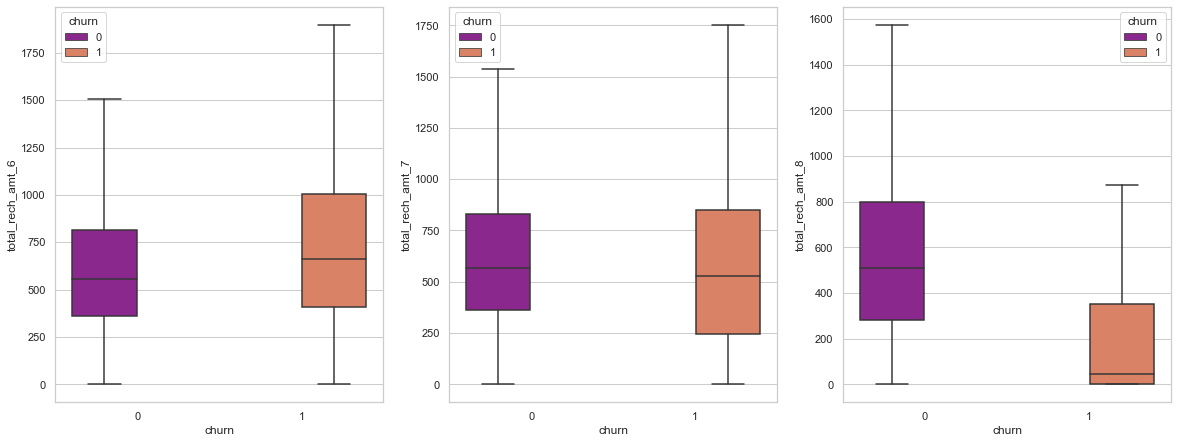

In [32]:
#A. Ploting for Total Recharge Amount:
plot_box_chart('total_rech_amt')

**Observation:**
- We can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase)
- Whereas, for non-churned customers we see consitent recharges being made through all months

- **This shows, that recharge amount trend can help infer a customer's possibility to churn post the action phase**

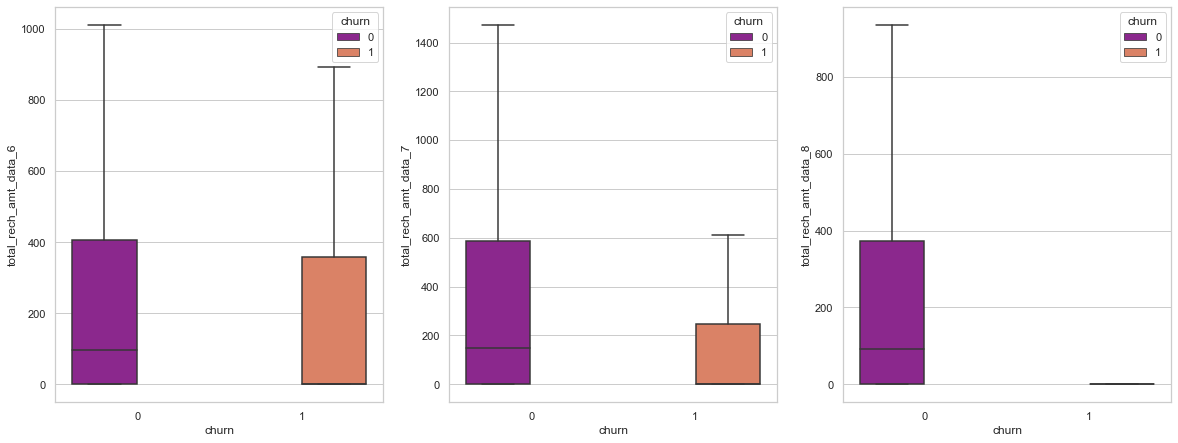

In [33]:
#B. Plotting for Total Recharge Amount for Data:
plot_box_chart('total_rech_amt_data')

**Observation:** 

- There is a huge drop in total recharge amount for data in the 8th month (action phase) for churned customers
- For non-churned customers the amount spent on recharging for data is more or less similar through all months

- **This shows, that the recharge amount spent on data by a customer in the action phase, can be another way to identify if the customer is going to churn or not**

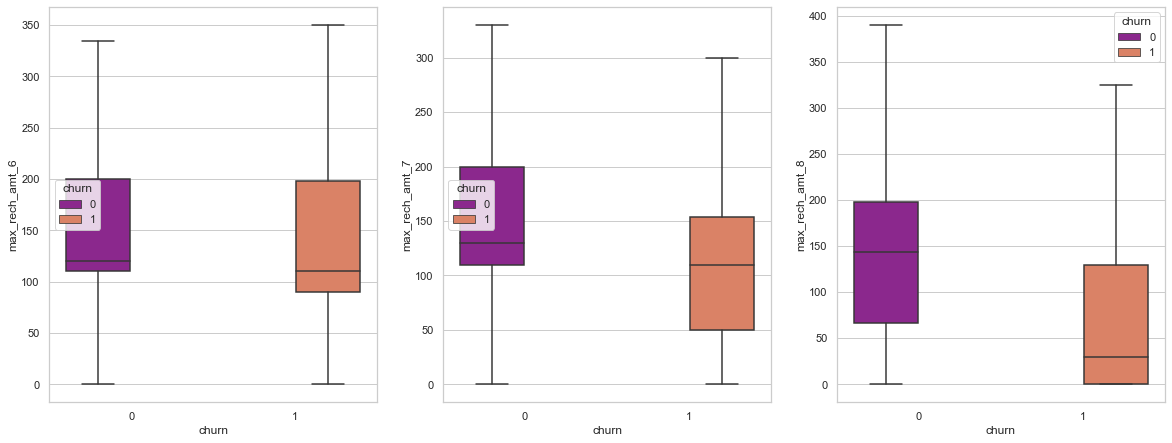

In [34]:
# C. Plotting for Maximum Recharge Amount:
plot_box_chart('max_rech_amt')

**Observation**

- There is a huge drop in maximum recharge amount spent in the 8th month (action phase) for churned customers
- Whereas, for non-churned customers the median value of maximum recharge amount spent has instead increased in the 8th month
- **This can be a helpful identifier to understand the characterstics of customer who may churn post the action phase**

In [35]:
#Let's check other recharge related variables:
other_recharge = base_df_high_val_cust.columns[base_df_high_val_cust.columns.str.contains('rech_num|max_rech_data',regex=True)]


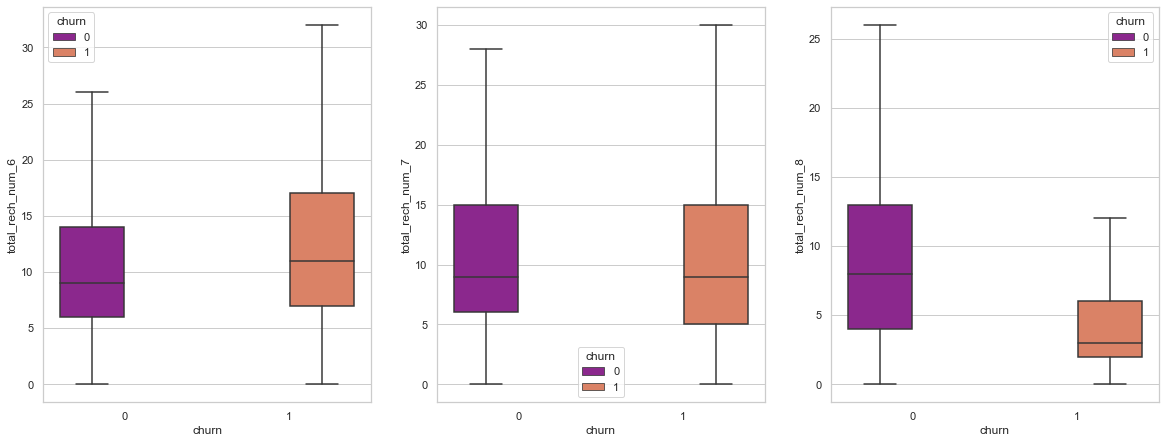

In [36]:
#D. Plotting for Total recharge for Number:
plot_box_chart('total_rech_num')

**Observations:**

- There is a huge drop in total recharge for number also in the 8th month (action phase) for churned customers
- Whereas, for non-churned customers the recharge for number is similar across all months
- **This can help us infer if the customer will churn or not, post action phase**

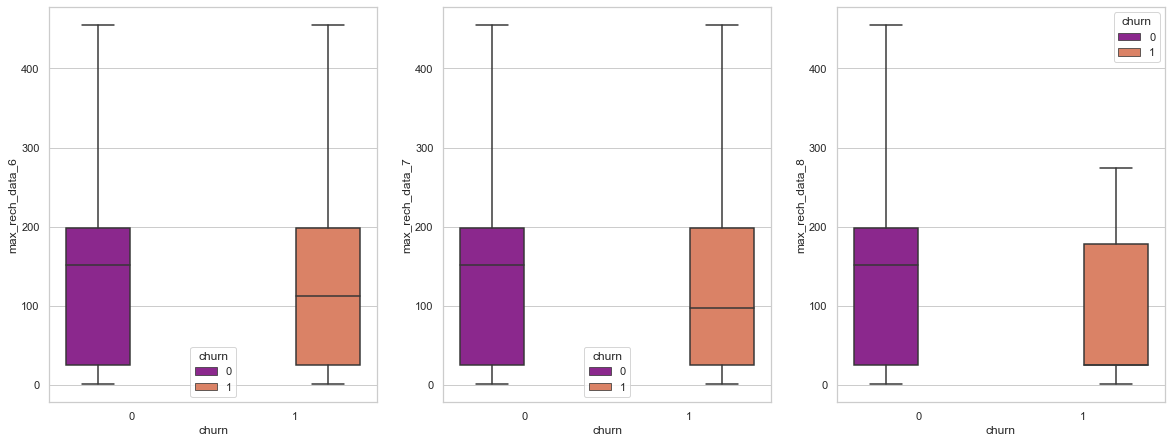

In [37]:
# E. Ploting for maximum recharge for data:
plot_box_chart('max_rech_data')

**Observation:** 

- There is a huge drop in maximum recharge amount spent for data also in the 8th month (action phase) for churned customers
- Whereas, for non-churned customers it is similar across all 3 months
- **This can be helpful to infer if the customers are nearing churn or not, post action phase**

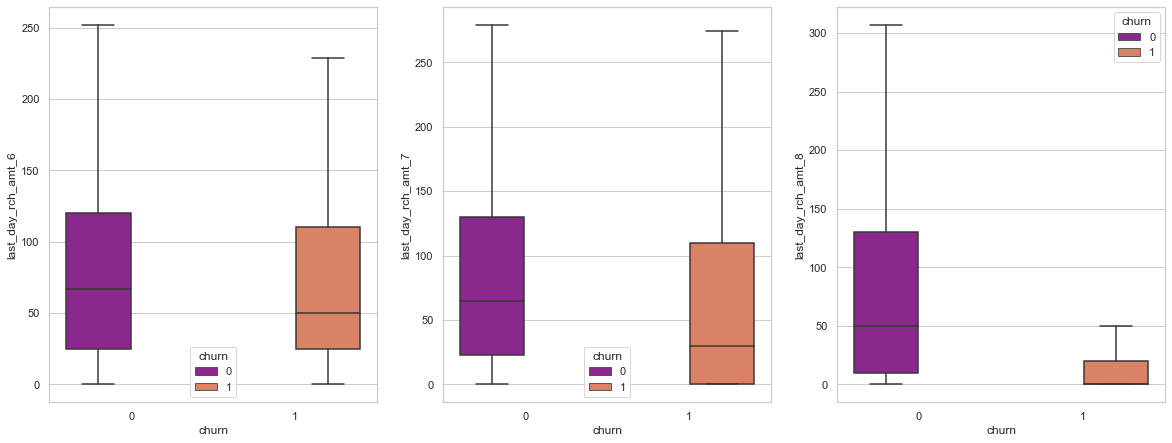

In [38]:
#Getting the last day recharge amount columns
last_day_rech_amt = base_df_high_val_cust.columns[base_df_high_val_cust.columns.str.contains('day')]

#Viewing the list of columns related to last day recharge amount related columns
last_day_rech_amt.tolist()

# F. Ploting for last day recharge amount:
plot_box_chart('last_day_rch_amt')

**Observations:**
- There is a huge drop in 8th month recharge amount for churned customers

In [39]:
# lets check the % of NA values for the other recharge related variables
100*base_df_high_val_cust.loc[:,other_recharge].isnull().sum()/len(base_df_high_val_cust)

total_rech_num_6                   0.00
total_rech_num_7                   0.00
total_rech_num_8                   0.00
max_rech_data_6                   44.11
max_rech_data_7                   43.12
max_rech_data_8                   46.80
dtype: float64

As observed, maximum recharge amount spent on data for 6th, 7th and 8th months have a percentage of NaN/missing values. We would analyse these columns further to understand the implication of these missing values. 

In [40]:
base_df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,"16,740.00","17,038.00","15,935.00"
mean,139.80,140.44,136.35
std,118.89,120.30,119.57
min,1.00,1.00,1.00
25%,25.00,25.00,25.00
50%,152.00,152.00,152.00
75%,198.00,198.00,198.00
max,"1,555.00","1,555.00","1,555.00"


**Observation:**
- The minimum value is 1 while the max is 1555 across months, which indicate the missing values are where no recharges happened for the data. Filling the missing values by 0, means no recharge

In [41]:
base_df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= base_df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

### 2.2 Analysing 2G and 3G usage related attributes 

In [42]:
#Listing columns associated to 2G and 3G usage
usage_2g_and_3g = base_df_high_val_cust.columns[base_df_high_val_cust.columns.str.contains('2g|3g',regex=True)]

In [43]:
#Checking the % of NA values present in these columns
percentage_3g_2g_null_check = 100*base_df_high_val_cust.loc[:,usage_2g_and_3g].isnull().sum()/len(base_df_high_val_cust.loc[:,usage_2g_and_3g])
df = pd.DataFrame(percentage_3g_2g_null_check)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df = pd.DataFrame(df.Null_Percentage).style.applymap(color_red)
display(df)

,Null_Percentage
count_rech_2g_6,44.112443
count_rech_2g_7,43.117551
count_rech_2g_8,46.799987
count_rech_3g_6,44.112443
count_rech_3g_7,43.117551
count_rech_3g_8,46.799987
vol_2g_mb_6,0.000000
vol_2g_mb_7,0.000000
vol_2g_mb_8,0.000000
vol_3g_mb_6,0.000000


**Observations**:
- More than 40% values are not available for 'count of recharge' and 'average revenue for 2G/3G per user'
- We have 2G/3G volume usage based data available, hence we can drop the aforementioned columns

In [44]:
#Dropping the columns with >40% NA values - 
base_df_high_val_cust.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

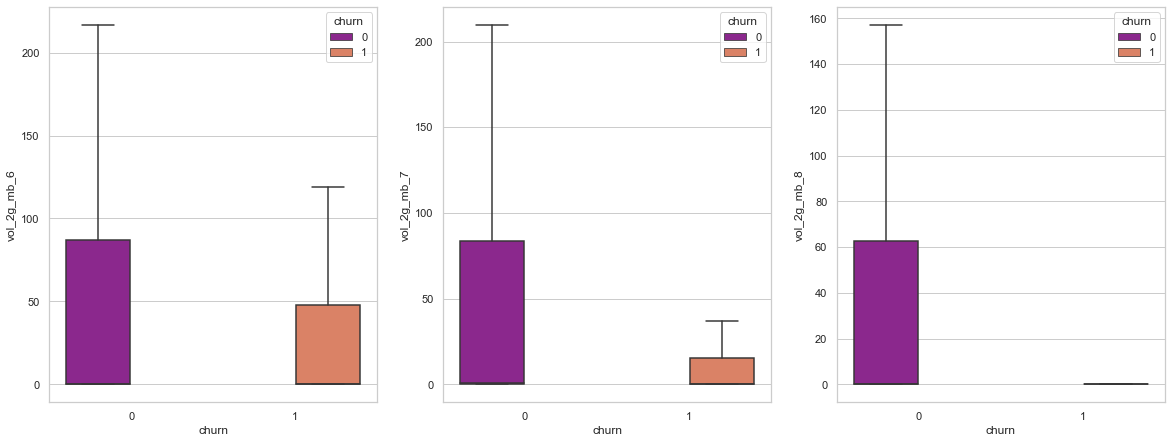

In [45]:
# A. Ploting for volume of 2G columns:
plot_box_chart('vol_2g_mb')

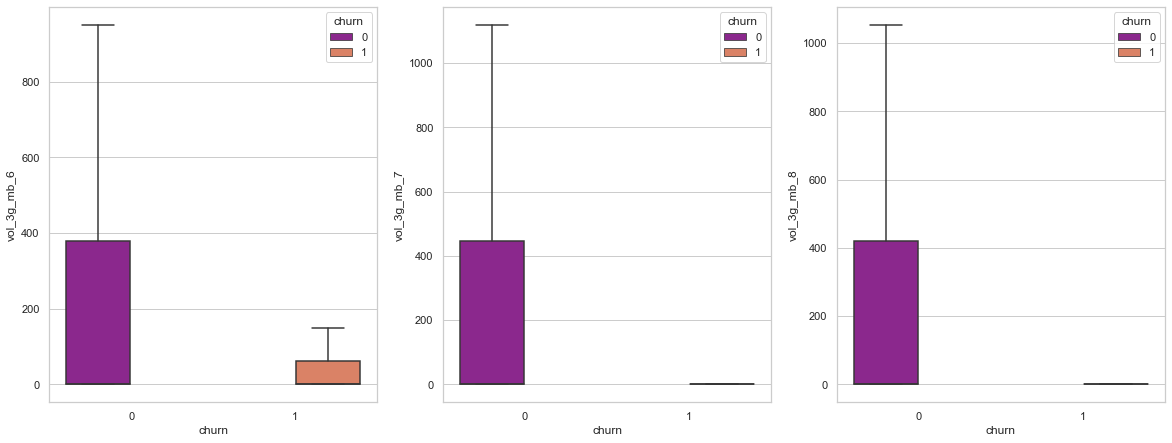

In [46]:
#B. Plotting for volume of 3G usage: 
plot_box_chart('vol_3g_mb')

**Observations:** 
We have two observations from above:

- 2G and 3G usage for churned customers drops in 8th month
- Also, the 2G/3G usage is higher for non-churned customers indicating that churned customers might be from areas where 2G/3G service is not properly available

In [47]:
# Analysing monthly 2G/3G service schemes: 
monthly_subcription_2g_3g = base_df_high_val_cust.columns[base_df_high_val_cust.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

In [48]:
#Describing the monthly subscription related columns
base_df_high_val_cust[monthly_subcription_2g_3g].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   monthly_2g_6  29953 non-null  int64
 1   monthly_2g_7  29953 non-null  int64
 2   monthly_2g_8  29953 non-null  int64
 3   monthly_3g_6  29953 non-null  int64
 4   monthly_3g_7  29953 non-null  int64
 5   monthly_3g_8  29953 non-null  int64
dtypes: int64(6)
memory usage: 2.6 MB


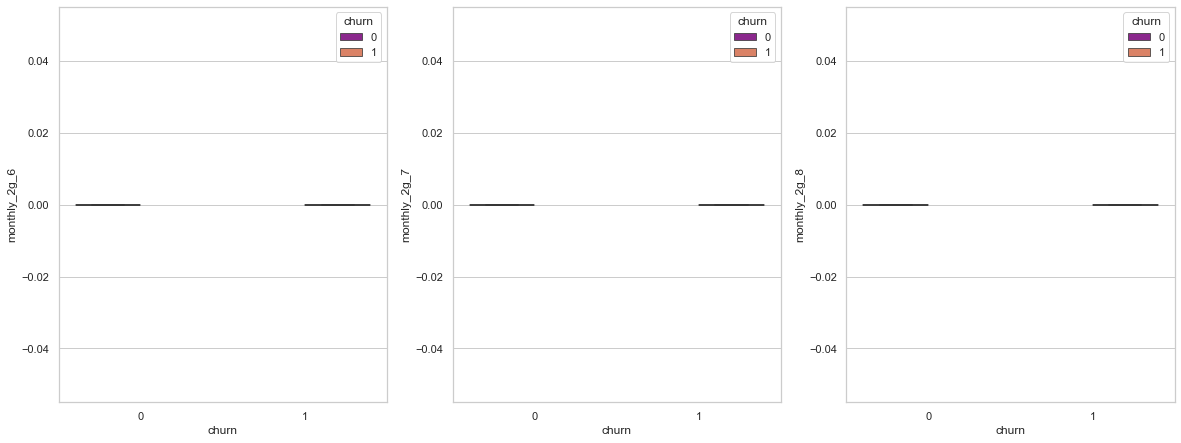

In [49]:
# C. Ploting for monthly subscription - 2G:
plot_box_chart('monthly_2g')

**Observation:**
- Value range is very low, hence graph is not giving us proper justification result .Hence doing analysis by checking mean value

In [50]:
#Defining UDF to plot bar chart using mean value - to analyse 2G/3G monthly subsrciptions
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

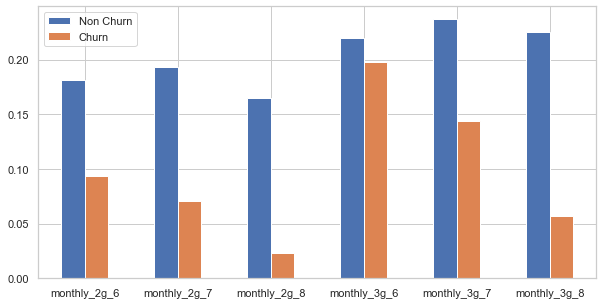

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.18,0.19,0.17,0.22,0.24,0.22
Churn,0.09,0.07,0.02,0.20,0.14,0.06


In [51]:
#D. Plotting monthly subscription stats for 2G/3G services - 
plot_mean_bar_chart(base_df_high_val_cust, monthly_subcription_2g_3g)

**Observations**:
- We can see a drop in monthly subscription for churned customers in 8th Month

In [52]:
# let's check Volume based cost 
vbc_column = base_df_high_val_cust.columns[base_df_high_val_cust.columns.str.contains('vbc_',regex=True)]
vbc_column.tolist()

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [53]:
# Renaming month named vbc columns to 6,7,8,9 format
base_df_high_val_cust.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# Dropping 9th month column as it is not needed
base_df_high_val_cust.drop('vbc_3g_9',axis=1,inplace=True)

In [54]:
#Listing Volume based cost related columns for 3G services - 
vbc_column = base_df_high_val_cust.columns[base_df_high_val_cust.columns.str.contains('vbc_3g',regex=True)]
vbc_column.tolist()

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

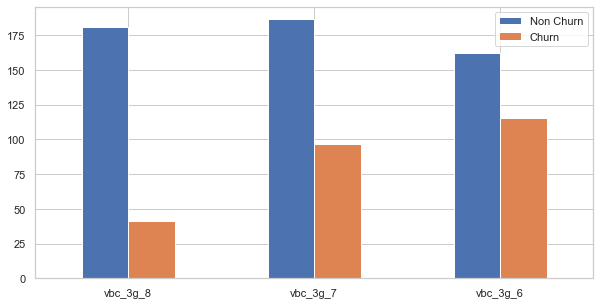

,vbc_3g_8,vbc_3g_7,vbc_3g_6
Non Churn,180.62,186.37,162.56
Churn,40.94,96.34,115.46


In [55]:
# E. Ploting for volume based cost-3G for churn & non-churn customers
plot_mean_bar_chart(base_df_high_val_cust, vbc_column)

**Observations**
- It shows that volume based cost for 3G is much lower for Churned customers as compared to Non-Churned Customers
- There is also a drop in vbc in 8th month

In [56]:
# Analysing Service schemes with validity smaller than a month for 2G/3G
SC_2g_or_3g_col = base_df_high_val_cust.columns[base_df_high_val_cust.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

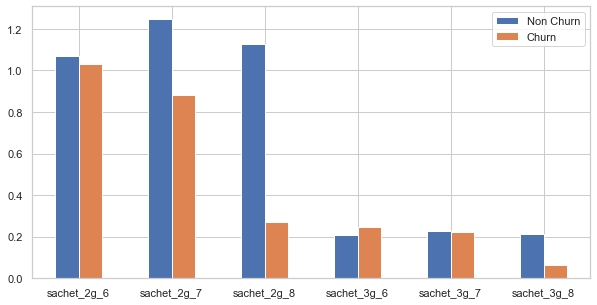

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,1.07,1.25,1.13,0.21,0.23,0.21
Churn,1.03,0.88,0.27,0.24,0.22,0.07


In [57]:
#F.Plotting Service schemes with validity smaller than a month for 2G/3G
plot_mean_bar_chart(base_df_high_val_cust, SC_2g_or_3g_col)

**Observations:**
- We can see the drop in sachet services in 8th month for churned cutsomers

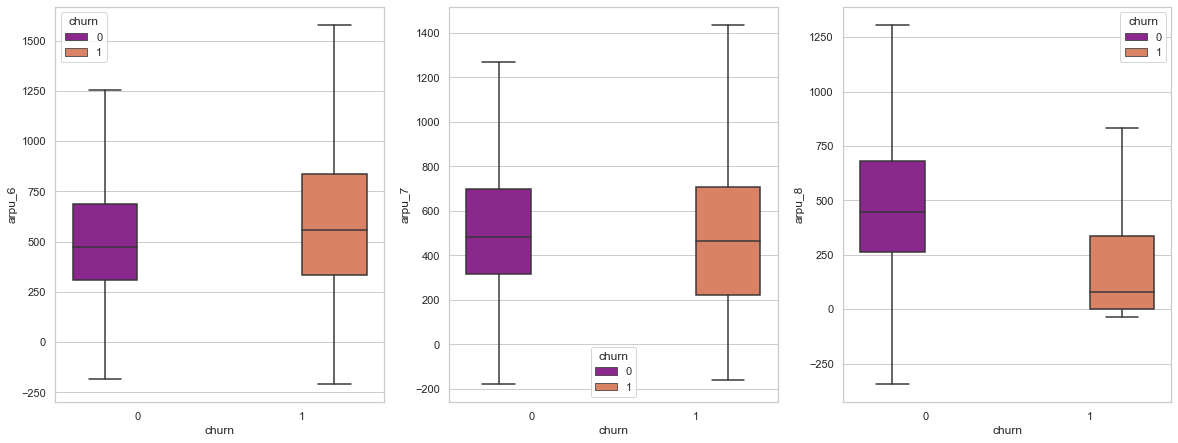

In [58]:
# Checking columns for average revenue per user
arpu_cols = base_df_high_val_cust.columns[base_df_high_val_cust.columns.str.contains('arpu_')]

# Plotting arpu
plot_box_chart('arpu')

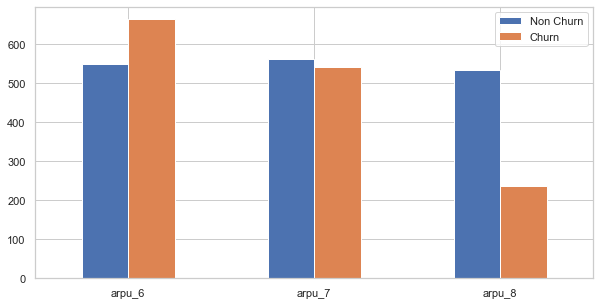

,arpu_6,arpu_7,arpu_8
Non Churn,549.55,562.93,532.87
Churn,663.71,541.15,237.66


In [59]:
plot_mean_bar_chart(base_df_high_val_cust, arpu_cols)

**Observations:**

- We can see huge drop for ARPU in 8th month for churned customers

### 2.3 Analysing Minutes of usage - Voice Calls

In [60]:
#Listing the columns related to Minutes of Usage
mou_cols = base_df_high_val_cust.columns[base_df_high_val_cust.columns.str.contains('mou')]
#Viewing the list
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [61]:
#Describing the dataframe containing MoU related columns for NA values - 
meta_df = get_meta_data(base_df_high_val_cust[mou_cols])
meta_df.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
col_to_display = ['Null_Percentage']
meta_df[col_to_display]

,Null_Percentage
isd_ic_mou_8,3.91
loc_ic_t2t_mou_8,3.91
loc_ic_t2m_mou_8,3.91
std_og_t2t_mou_8,3.91
loc_og_t2c_mou_8,3.91
...,...
total_ic_mou_6,0.00
total_ic_mou_7,0.00
total_ic_mou_8,0.00
total_og_mou_6,0.00


**Observations**:
- For all minutes of usage columns the maximum missing value % is 3.91
- Implying that in these cases the customers have not used calling services, thus we can fill the missing values with zero

In [62]:
# replacing null values by 0 for minutes of usage variables
base_df_high_val_cust.loc[:,mou_cols] = base_df_high_val_cust.loc[:,mou_cols].replace(np.NaN,0)

#Storing the updated MoU columns in a temporary dataframe for quick check - 
mou_og_cols6 = base_df_high_val_cust.columns[base_df_high_val_cust.columns.str.contains('.*_og_.*mou_6',regex=True)]

#Describing the subset dataframe with MoU columns after replacing NaN with 0
base_df_high_val_cust.loc[:,mou_og_cols6].describe()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
count,"29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00"
mean,26.60,84.57,163.31,6.35,1.58,254.24,165.90,179.44,1.81,347.15,2.17,5.83,610.06
std,116.27,228.96,250.22,22.14,6.31,378.55,403.99,409.14,11.99,608.85,45.89,17.58,691.18
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,4.38,19.21,0.00,0.00,32.26,0.00,0.00,0.00,0.40,0.00,0.00,116.64
50%,0.00,24.36,77.26,0.00,0.00,124.59,2.71,16.36,0.00,45.08,0.00,0.23,410.63
75%,0.00,78.06,209.03,4.23,0.00,332.31,109.56,154.54,0.00,465.29,0.00,5.21,859.03
max,"3,775.11","6,431.33","4,729.74","1,466.03",271.44,"10,643.38","7,366.58","8,314.76",628.56,"8,432.99","5,900.66","1,023.21","10,674.03"


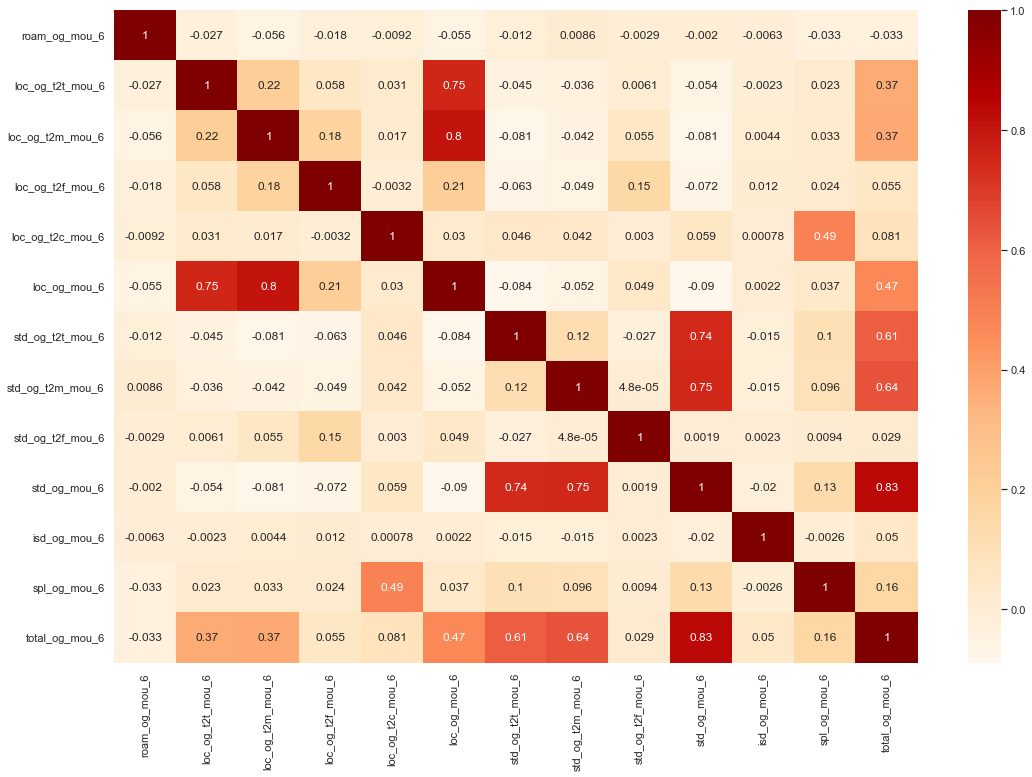

In [63]:
#Plotting a correlation heatmap between all MoU columns - 

heatmap(18,12,base_df_high_val_cust.filter(mou_og_cols6))

**Observations:**
- Here, total_og_mou_6, std_og_mou_6 and loc_og_mou_6 seem to have strong correlation with other fields 
- This needs to be inspected to avoid any multicolinearity issues

In [64]:
#Checking 'total_og_mou_6' column for multicollinearity with other columns - 
print(base_df_high_val_cust.loc[8,'total_og_mou_6'],"==",base_df_high_val_cust.loc[8,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())

508.36 == 508.34999999999997


**Observation**
- We can see that total_og_mou_6 is a combination of other variables present in dataset.So, these columns can be removed for all months from the dataset, as they don't introduce any variance

- Following a similar methodology for the columns - std_og_mou_6 and loc_og_mou_6

In [65]:
#Listing columns related to outgoing calls - total, standard, local:
list_total_og_cols = base_df_high_val_cust.columns[base_df_high_val_cust.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]

#dropping these columns from the high value customer dataframe due to multicollinearity
#The columns are dropped from the dataframe directly
base_df_high_val_cust.drop(list_total_og_cols,axis=1,inplace=True)

#Listing the names of columns that have been dropped before further analysis-
log("Columns dropped - ")
list_total_og_cols.tolist()

> <span style='color:blue'>Columns dropped - </span>

['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

### 2.4: Analysing Incoming MoU related variables- 

In [66]:
#Listing all columns related to MoU for Incoming calls-
mou_ic_cols6 = base_df_high_val_cust.columns[base_df_high_val_cust.columns.str.contains('.*_ic_.*mou_6',regex=True)]

#Statistically describing the Incoming calls MoU columns
base_df_high_val_cust.loc[:,mou_ic_cols6].describe()

,roam_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6
count,"29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00"
mean,16.12,65.51,150.47,15.29,231.28,14.90,29.21,2.70,46.81,290.12,0.06,10.80
std,76.34,163.86,219.32,45.79,315.01,77.75,98.28,19.11,137.60,365.74,0.19,76.79
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,6.10,28.09,0.00,47.91,0.00,0.00,0.00,1.03,72.89,0.00,0.00
50%,0.00,25.08,84.11,1.84,134.56,0.38,5.00,0.00,11.41,183.78,0.00,0.00
75%,0.00,67.48,188.74,11.98,297.26,8.19,23.63,0.11,41.49,372.16,0.00,0.00
max,"2,613.31","6,351.44","4,693.86","1,678.41","7,454.63","5,459.56","4,630.23","1,351.11","5,459.63","7,716.14",19.76,"6,789.41"


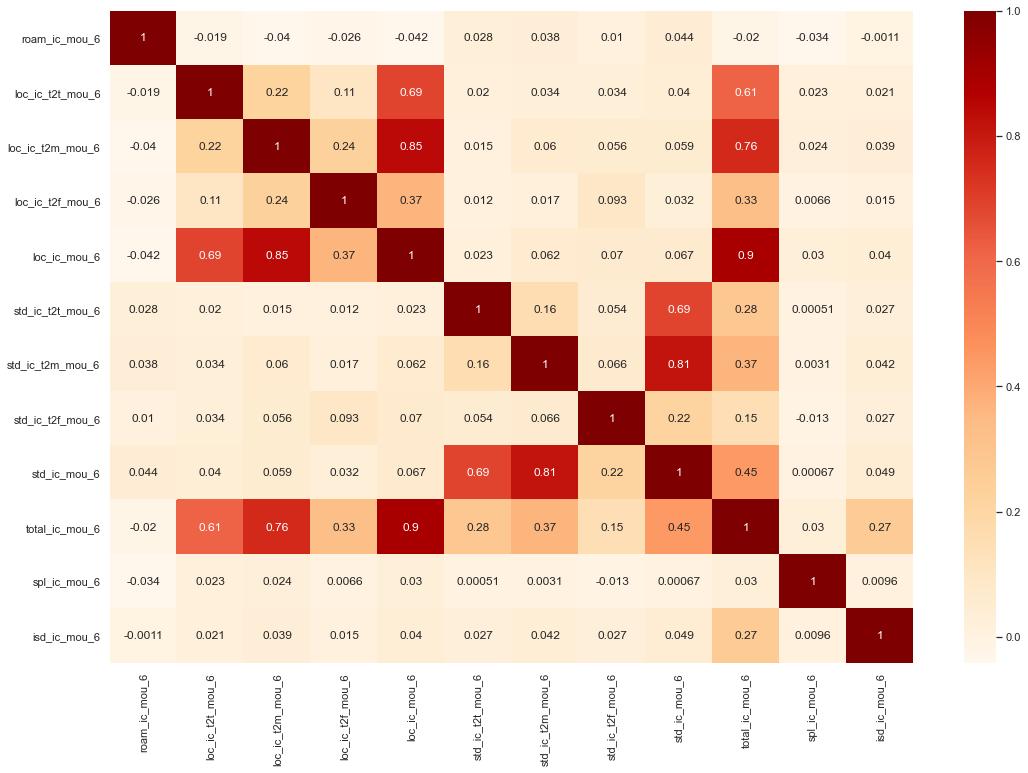

In [67]:
#Heatmap to identify fields highly related with MoU Incoming Calls-
heatmap(18,12,base_df_high_val_cust.filter(mou_ic_cols6))

**Observations:** 
- Here the columns, total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 seem to have strong correlation with other fields and need to be inspected to avoid any multicolinearity issues

In [68]:
#Checking for multicollinearity with total_ic_mou_6 column -
print(base_df_high_val_cust.loc[21,'total_ic_mou_6'],"==",base_df_high_val_cust.loc[21,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())

207.09 == 207.09


**Observations**
- Here the column, total_ic_mou_6, is a combination of other variables present in dataset.So we can remove these columns for all months from the data set as they dont add any variance to our data

- Similary methodology is followed for the columns- std_ic_mou_6 and loc_ic_mou_6

In [69]:
#Listing and dropping the highly collinear columns-
list_total_ic_cols = base_df_high_val_cust.columns[base_df_high_val_cust.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
base_df_high_val_cust.drop(list_total_ic_cols,axis=1,inplace=True)

#Listing the columns dropped from analysis-
log("Columns dropped - ")
list_total_ic_cols.tolist()

> <span style='color:blue'>Columns dropped - </span>

['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

### 2.5: Analysing Offnet Usage

In [70]:
#Listing columns related to Offnet usage-
offnet_usage_service_col = base_df_high_val_cust.columns[base_df_high_val_cust.columns.str.contains('offnet.*mou',regex=True)]

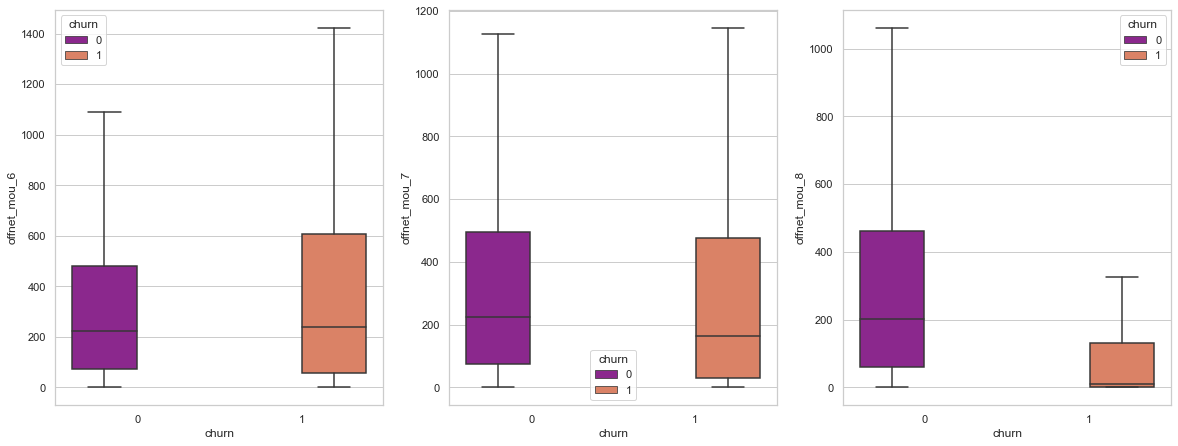

In [71]:
# Offnet MoU values for churned and non churned customers-
plot_box_chart('offnet_mou')

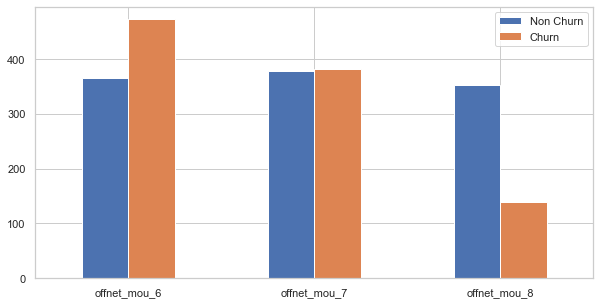

,offnet_mou_6,offnet_mou_7,offnet_mou_8
Non Churn,365.12,377.88,352.50
Churn,471.95,382.28,138.52


In [72]:
#Analysing MoU for Offnet Services - 
plot_mean_bar_chart(base_df_high_val_cust, offnet_usage_service_col)

**Observations:**
- We can see the drop for offnet mou services in the 8th month

### 2.6 Analysing ONNET : All kind of calls within the same operator network

In [73]:
#Listing MoU columns related to Onnet Usage-
onnet_usage_service =  base_df_high_val_cust.columns[base_df_high_val_cust.columns.str.contains('^onnet.*mou',regex=True)]

onnet_usage_service

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], dtype='object')

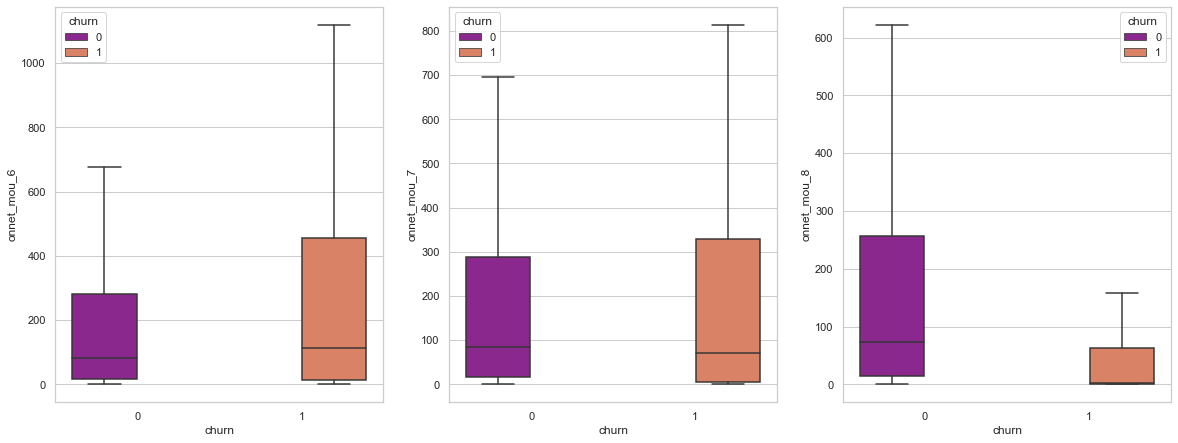

In [74]:
# Plotting onnet MoU by customer segment - 
plot_box_chart('onnet_mou')

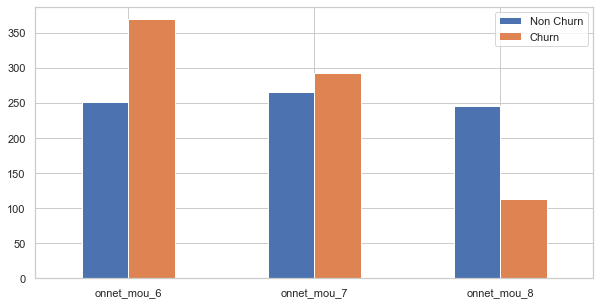

,onnet_mou_6,onnet_mou_7,onnet_mou_8
Non Churn,251.37,265.86,245.03
Churn,368.66,292.85,113.48


In [75]:
#Analysing Onnet MoU by customer Segment - 
plot_mean_bar_chart(base_df_high_val_cust, onnet_usage_service)

**Observation**
- There is a drop in Onnet usage in the 8th month for churned customers

### 2.7: Tenure Analysis for Customers

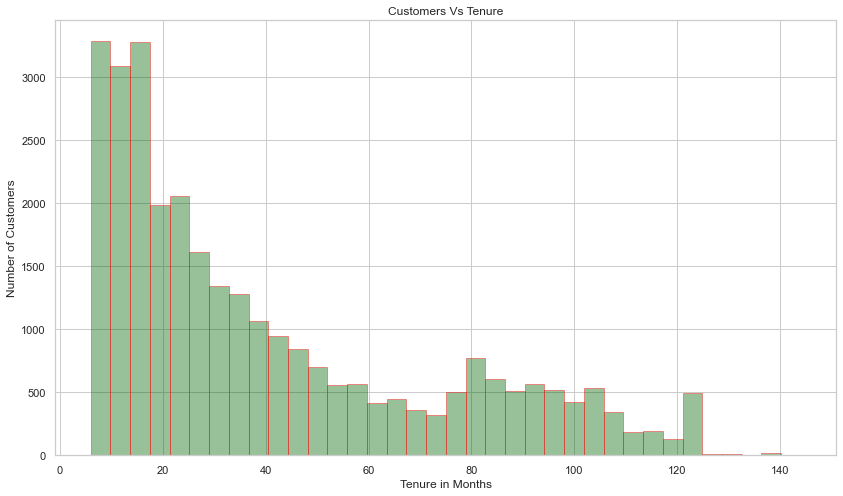

In [76]:
#Filtering Tenure data for customers
tenure_data = base_df_high_val_cust.copy()

plt.figure(figsize=(14,8))
# aon --> Age on network - number of days the customer is using the operator T network
tenure_data['tenure'] = tenure_data['aon']/30
tenure_data['tenure'].head()
ax = sns.distplot(tenure_data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers Vs Tenure')
plt.show()

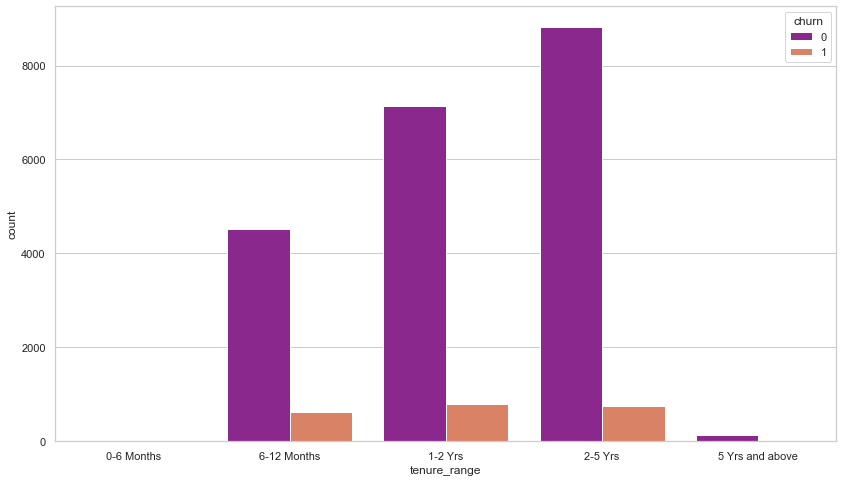

In [77]:
#Creating buckets for Tenure - 
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)
tenure_data['tenure_range'].head()

#Analysing churn by Tenure - 
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data,palette=("plasma"))
plt.show()

### Part 3: Preparing Final Dataframe before Modelling - 

#### 3.1: Checking columns with more than 30% NA values - 

In [78]:
meta_df = get_meta_data(base_df_high_val_cust)
meta_df = meta_df[meta_df["Null_Percentage"] > 30]
meta_df.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
col_to_display = ['Null_Percentage']
meta_df[col_to_display]

,Null_Percentage
date_of_last_rech_data_8,46.80
night_pck_user_8,46.80
fb_user_8,46.80
date_of_last_rech_data_6,44.11
night_pck_user_6,44.11
fb_user_6,44.11
date_of_last_rech_data_7,43.12
night_pck_user_7,43.12
fb_user_7,43.12


In [79]:
#Dropping these columns with >30% NA values
is_more_30 = meta_df.index
base_df_high_val_cust.drop(base_df_high_val_cust[is_more_30],axis=1,inplace=True)
base_df_high_val_cust.shape

(29953, 124)

In [80]:
#Replacing NA values in remaining columns
meta_df = get_meta_data(base_df_high_val_cust)
meta_df = meta_df[meta_df["Null_Percentage"] > 0]
meta_df.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
col_to_display = ['Null_Percentage']
meta_df[col_to_display]

,Null_Percentage
og_others_8,3.91
ic_others_8,3.91
date_of_last_rech_8,1.94
og_others_6,1.81
ic_others_6,1.81
og_others_7,1.79
ic_others_7,1.79
date_of_last_rech_7,0.33
date_of_last_rech_6,0.24


In [81]:
base_df_high_val_cust[meta_df.index].head(3)

,og_others_8,ic_others_8,date_of_last_rech_8,og_others_6,ic_others_6,og_others_7,ic_others_7,date_of_last_rech_7,date_of_last_rech_6
0,0.00,0.00,2014-08-08,NaN,NaN,NaN,NaN,2014-07-16,2014-06-21
7,0.00,15.14,2014-08-26,0.00,15.74,0.00,15.19,2014-07-25,2014-06-27
8,0.00,0.00,2014-08-30,0.00,0.00,0.00,0.00,2014-07-31,2014-06-25


In [82]:
#Handling Numeric Fields for NA values - 
numberic_col = ['og_others_8', 'ic_others_8', 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7']

#Replacing NaN values with 0 for all numeric fields 
for i in numberic_col:
    base_df_high_val_cust.loc[base_df_high_val_cust[i].isnull(),i]=0
    
base_df_high_val_cust[meta_df.index].head(3)

,og_others_8,ic_others_8,date_of_last_rech_8,og_others_6,ic_others_6,og_others_7,ic_others_7,date_of_last_rech_7,date_of_last_rech_6
0,0.00,0.00,2014-08-08,0.00,0.00,0.00,0.00,2014-07-16,2014-06-21
7,0.00,15.14,2014-08-26,0.00,15.74,0.00,15.19,2014-07-25,2014-06-27
8,0.00,0.00,2014-08-30,0.00,0.00,0.00,0.00,2014-07-31,2014-06-25


In [83]:
#Final check for remaining columns with Null Values-
meta_df = get_meta_data(base_df_high_val_cust)
meta_df = meta_df[meta_df["Null_Percentage"] > 0]
meta_df.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
col_to_display = ['Null_Percentage']
meta_df[col_to_display]

,Null_Percentage
date_of_last_rech_8,1.94
date_of_last_rech_7,0.33
date_of_last_rech_6,0.24


#### 3.2. Adding new features to the dataframe- 

In [84]:
#Storing the dataframe into final dataframe
base_df_final = base_df_high_val_cust.copy()
print(base_df_final.shape)
base_df_final.head(3)

(29953, 124)


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,...,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase,churn
0,7000842753,197.38,214.82,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,...,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.00,1.00,1.00,252.00,252.00,252.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,252.00,252.00,252.00,559.00,1
7,7000701601,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,58.14,32.26,27.31,217.56,...,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.00,0.00,"1,185.00",1
8,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,23.84,9.84,0.31,57.58,...,21,14,437,601,120,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,354.00,207.00,696.00,0


In [85]:
base_df_final.drop(["total_avg_rech_amnt_6_7_GPhase"],axis=1,inplace=True)
base_df_final.drop(base_df_high_val_cust.filter(regex='date_').columns,axis=1,inplace=True)
print (base_df_final.shape)

col_list = base_df_final.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    base_df_final[avg_col_name] = (base_df_final[col_6]  + base_df_final[col_7])/ 2

(29953, 120)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g
total_rech_amt_data


In [86]:
col_list_to_drop = base_df_final.filter(regex='_6|_7')
base_df_final.drop(col_list_to_drop,axis=1,inplace=True)
print (base_df_final.shape)

(29953, 81)


In [87]:
base_df_final.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_amt_data_8,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,7000842753,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,4.13,1.15,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,1.00,252.00,252.00,5.75,109.61,0,0,1,0,968,30.40,252.00,1,206.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.50,307.00,252.00,252.00,1.00,252.00,252.00,15.72,117.16,0.00,0.00,1.00,0.00,50.60,252.00
7,7000701601,"3,171.48",52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,12.01,49.14,16.68,10.01,6.50,0.00,27.31,121.19,39.53,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0,0,0,0,802,57.74,0.00,1,"1,209.51",56.26,510.29,24.86,18.16,41.38,378.00,58.64,0.00,13.79,40.83,13.37,0.09,2.25,0.00,45.20,219.53,126.81,24.36,109.22,43.22,0.10,8.29,15.46,5.00,"1,185.00","1,185.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.06,0.00
8,7001524846,137.36,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,22.58,75.69,0.00,0.00,10.23,0.00,0.31,15.48,0.00,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,3.00,23.00,69.00,0.03,11.94,0,3,0,0,315,21.03,207.00,0,435.47,382.36,87.64,0.00,0.00,257.36,75.77,0.00,0.00,125.00,11.86,0.00,0.00,0.00,0.00,16.84,35.78,0.00,0.29,13.25,0.00,0.00,0.00,0.00,20.00,519.00,122.00,25.00,1.00,77.00,88.50,178.00,375.48,0.50,0.50,0.00,0.00,516.40,177.00
21,7002124215,637.76,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,61.79,876.99,0.00,0.00,0.00,0.00,19.54,129.16,10.39,0.18,101.74,0.00,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0,0,0,0,720,0.00,0.00,0,556.10,117.26,827.30,0.00,0.00,5.32,89.87,0.38,0.00,111.94,737.05,0.00,0.00,0.00,0.00,6.33,96.43,3.73,10.02,52.96,0.00,0.00,0.00,0.00,24.00,640.00,50.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
23,7000887461,366.97,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,0.00,39.61,0.00,0.00,17.71,0.00,76.64,146.84,0.71,13.38,43.91,0.00,0.00,3.74,13.06,4,439,179,0,2.00,179.00,270.00,0.01,"1,009.92",0,0,1,1,604,40.45,540.00,0,134.12,49.81,87.38,0.00,0.00,49.81,82.97,0.00,0.00,0.00,4.35,0.00,0.01,0.05,0.00,40.88,104.63,0.00,0.26,8.66,0.00,0.00,14.12,2.67,4.00,227.00,89.50,89.50,1.00,89.50,178.00,0.24,299.55,0.00,0.00,1.00,0.00,25.93,356.00


**Conclusion:**
- We have merged & dropped most of the correlated columns related to month 6 & 7 so to reduce the number of features. - By doing this the unique features are now 81.

## Part 4: Modelling

### 4.1: PCA - Principal Component Analysis

In [88]:
telecom_pca_df = base_df_final.copy()

In [89]:
#conda install -c conda-forge imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

def split_data(df):
    Y = df["churn"]
    X = df.drop(["churn","mobile_number"],axis=1)
    return X,Y
    
def scale_data(X):
    scaler = StandardScaler()
    X_col = X.columns
    X_scaled = scaler.fit_transform(X)
    X_scale_final = pd.DataFrame(X_scaled, columns=X_col)
    log("Scaling the data ....")
    return X_scale_final

def get_scree_plot(X):
    pca = PCA(svd_solver='randomized', random_state=101)
    pca.fit(X)
    fig = plt.figure(figsize = (8,6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cummulative explained variance')
    plt.show()
    return pca
    
    
def resampling_data(X,Y,feature_number,train_size=0.7,test_size=0.3) :
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, train_size=train_size, random_state=1)

    log("Shape of train datatset before : "+str(x_train.shape))
    log("Percentage of Churned customer data : "+str(round(100*Y.sum()/len(Y),2)))
    log("Applying SMOTE to normalize imbalance ....")

    #Initializing SMOTE: Synthetic Minority Over-sampling Technique
    # using this as data is skewed 
    smote = SMOTE()
    x_tr,y_tr = smote.fit_resample(x_train,y_train)
    log("Shape of train datatset after SMOTE : "+str(x_tr.shape))

    # Applying PCA : Principal Component Analysis
    pca = IncrementalPCA(n_components=feature_number)    
    x_tr_pca = pca.fit_transform(x_tr)
    x_test_pca = pca.transform(x_test)
    log("Shape of train datatset after PCA : "+str(x_tr_pca.shape))

    return x_tr_pca,x_test_pca,y_tr,y_test

In [90]:
X,Y=split_data(telecom_pca_df)

In [91]:
X.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_amt_data_8,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,4.13,1.15,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,1.00,252.00,252.00,5.75,109.61,0,0,1,0,968,30.40,252.00,206.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.50,307.00,252.00,252.00,1.00,252.00,252.00,15.72,117.16,0.00,0.00,1.00,0.00,50.60,252.00
7,"3,171.48",52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,12.01,49.14,16.68,10.01,6.50,0.00,27.31,121.19,39.53,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0,0,0,0,802,57.74,0.00,"1,209.51",56.26,510.29,24.86,18.16,41.38,378.00,58.64,0.00,13.79,40.83,13.37,0.09,2.25,0.00,45.20,219.53,126.81,24.36,109.22,43.22,0.10,8.29,15.46,5.00,"1,185.00","1,185.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.06,0.00
8,137.36,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,22.58,75.69,0.00,0.00,10.23,0.00,0.31,15.48,0.00,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,3.00,23.00,69.00,0.03,11.94,0,3,0,0,315,21.03,207.00,435.47,382.36,87.64,0.00,0.00,257.36,75.77,0.00,0.00,125.00,11.86,0.00,0.00,0.00,0.00,16.84,35.78,0.00,0.29,13.25,0.00,0.00,0.00,0.00,20.00,519.00,122.00,25.00,1.00,77.00,88.50,178.00,375.48,0.50,0.50,0.00,0.00,516.40,177.00
21,637.76,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,61.79,876.99,0.00,0.00,0.00,0.00,19.54,129.16,10.39,0.18,101.74,0.00,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0,0,0,0,720,0.00,0.00,556.10,117.26,827.30,0.00,0.00,5.32,89.87,0.38,0.00,111.94,737.05,0.00,0.00,0.00,0.00,6.33,96.43,3.73,10.02,52.96,0.00,0.00,0.00,0.00,24.00,640.00,50.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
23,366.97,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,0.00,39.61,0.00,0.00,17.71,0.00,76.64,146.84,0.71,13.38,43.91,0.00,0.00,3.74,13.06,4,439,179,0,2.00,179.00,270.00,0.01,"1,009.92",0,0,1,1,604,40.45,540.00,134.12,49.81,87.38,0.00,0.00,49.81,82.97,0.00,0.00,0.00,4.35,0.00,0.01,0.05,0.00,40.88,104.63,0.00,0.26,8.66,0.00,0.00,14.12,2.67,4.00,227.00,89.50,89.50,1.00,89.50,178.00,0.24,299.55,0.00,0.00,1.00,0.00,25.93,356.00


In [92]:
Y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

#### Percentage distribution of churn/non-churn customers

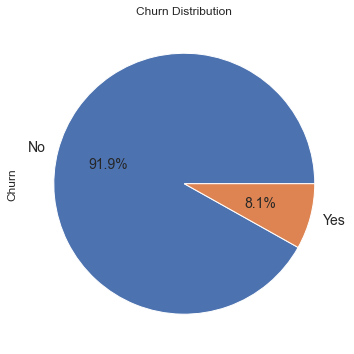

In [93]:
#Churn Distribution
pie_chart = telecom_pca_df['churn'].value_counts()*100.0 /len(telecom_pca_df)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

Scaling the data to normalise it

In [94]:
#Scaling the data - 
X_scaled = scale_data(X)
print(X_scaled.shape)
X_scaled.head(5)

> <span style='color:blue'>Scaling the data ....</span>

(29953, 79)


,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_amt_data_8,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,-0.59,-0.51,-0.70,-0.17,-0.19,-0.34,-0.65,-0.30,-0.24,-0.37,-0.38,-0.15,-0.04,-0.32,-0.02,-0.39,-0.66,-0.31,-0.19,-0.27,-0.13,-0.24,-0.16,-0.10,-0.86,-0.54,0.53,1.10,-0.21,1.62,0.66,-0.32,-0.26,-0.38,-0.42,1.28,-0.18,-0.25,-0.33,-0.13,-0.82,-0.60,-0.82,-0.22,-0.25,-0.38,-0.70,-0.30,-0.27,-0.44,-0.47,-0.16,-0.05,-0.37,-0.14,-0.42,-0.73,-0.35,-0.20,-0.32,-0.15,-0.27,-0.15,-0.10,-0.96,-0.69,0.53,1.30,-0.28,1.68,0.64,-0.37,-0.29,-0.46,-0.47,1.36,-0.23,-0.30,-0.19
1,5.30,-0.40,-0.02,0.26,0.17,-0.17,0.04,2.43,-0.24,-0.34,-0.26,1.38,0.18,-0.00,-0.02,-0.22,-0.12,0.58,0.23,1.10,0.99,-0.24,0.29,1.09,-0.32,4.99,8.19,4.73,-0.54,-0.66,-0.62,-0.34,-0.38,-0.38,-0.42,-0.34,-0.18,-0.43,-0.26,-0.29,1.51,-0.47,0.29,0.16,-0.06,-0.20,0.92,2.49,-0.27,-0.41,-0.36,1.00,-0.05,-0.24,-0.14,-0.13,0.33,2.50,0.12,0.84,2.26,0.43,-0.04,1.03,-0.79,1.02,6.57,-0.87,-0.65,-0.77,-0.74,-0.42,-0.43,-0.46,-0.47,-0.39,-0.23,-0.38,-0.40
2,-0.74,-0.43,-0.41,-0.17,-0.19,-0.29,-0.43,-0.30,0.76,-0.32,-0.20,-0.15,-0.04,0.18,-0.02,-0.39,-0.61,-0.33,-0.19,-0.26,-0.13,-0.24,-0.16,-0.10,0.43,-0.76,-0.75,-0.57,0.46,-0.45,-0.27,-0.34,-0.37,-0.38,0.77,-0.34,-0.18,-0.93,-0.35,-0.16,-0.29,0.27,-0.63,-0.22,-0.25,0.77,-0.38,-0.30,-0.27,-0.12,-0.44,-0.16,-0.05,-0.37,-0.14,-0.31,-0.56,-0.35,-0.20,-0.18,-0.15,-0.27,-0.15,-0.10,0.95,-0.28,-0.32,-0.65,-0.28,-0.02,-0.26,0.17,0.02,0.83,-0.27,-0.39,-0.23,0.88,-0.25
3,0.26,-0.33,1.35,-0.17,-0.19,-0.24,-0.20,-0.22,-0.24,-0.22,1.76,-0.15,-0.04,-0.32,-0.02,-0.27,-0.08,-0.09,-0.19,0.71,-0.13,-0.24,-0.16,-0.10,1.84,0.22,-0.64,-0.29,-0.54,-0.66,-0.62,-0.34,-0.38,-0.38,-0.42,-0.34,-0.18,-0.51,-0.40,-0.29,-0.01,-0.33,0.99,-0.22,-0.25,-0.36,-0.32,-0.29,-0.27,-0.15,1.40,-0.16,-0.05,-0.37,-0.14,-0.38,-0.26,-0.27,-0.07,0.24,-0.15,-0.27,-0.15,-0.10,1.41,-0.04,-0.78,-0.65,-0.65,-0.77,-0.74,-0.42,-0.43,-0.46,-0.47,-0.39,-0.23,-0.43,-0.40
4,-0.28,-0.44,-0.27,-0.17,-0.19,-0.20,-0.01,-0.30,2.24,-0.37,-0.29,-0.15,-0.04,0.55,-0.02,0.09,0.00,-0.32,-0.01,0.15,-0.13,-0.24,-0.10,0.93,-0.64,-0.24,0.11,-0.64,0.13,0.96,0.76,-0.34,0.72,-0.38,-0.42,1.28,0.72,-0.63,-0.31,0.05,-0.99,-0.49,-0.63,-0.22,-0.25,-0.16,-0.35,-0.30,-0.27,-0.44,-0.46,-0.16,-0.05,-0.37,-0.14,-0.16,-0.22,-0.35,-0.20,-0.23,-0.15,-0.27,0.04,0.10,-0.90,-0.84,-0.53,-0.10,-0.28,0.10,0.23,-0.42,-0.07,-0.46,-0.47,1.36,-0.23,-0.36,-0.11


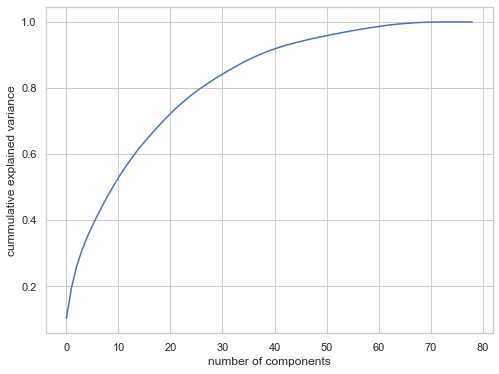

,PC1,PC2,PC3,Feature
0,0.00,0.29,0.15,arpu_8
1,-0.11,0.11,0.15,onnet_mou_8
2,-0.10,0.20,0.11,offnet_mou_8
3,-0.01,0.05,0.01,roam_ic_mou_8
4,-0.02,0.07,0.03,roam_og_mou_8
5,-0.03,0.10,0.02,loc_og_t2t_mou_8
6,-0.03,0.18,-0.03,loc_og_t2m_mou_8
7,0.01,0.11,-0.09,loc_og_t2f_mou_8
8,-0.01,0.02,0.08,loc_og_t2c_mou_8
9,-0.11,0.07,0.16,std_og_t2t_mou_8


In [95]:
#Understanding the variance explained by optimal number of features through PCA 
pca = get_scree_plot(X_scaled) # scree plot

col = list(X_scaled.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

In [96]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 10.34,  19.83,  26.28,  31.01,  34.99,  38.42,  41.6 ,  44.64,
        47.53,  50.26,  52.88,  55.32,  57.61,  59.77,  61.85,  63.73,
        65.53,  67.3 ,  69.04,  70.69,  72.3 ,  73.81,  75.24,  76.57,
        77.88,  79.06,  80.18,  81.26,  82.3 ,  83.28,  84.23,  85.16,
        86.06,  86.95,  87.79,  88.58,  89.34,  90.04,  90.69,  91.3 ,
        91.86,  92.4 ,  92.88,  93.3 ,  93.71,  94.11,  94.5 ,  94.86,
        95.2 ,  95.54,  95.87,  96.18,  96.49,  96.79,  97.07,  97.35,
        97.63,  97.9 ,  98.16,  98.4 ,  98.63,  98.84,  99.05,  99.23,
        99.39,  99.52,  99.64,  99.75,  99.85,  99.9 ,  99.94,  99.98,
       100.  , 100.01, 100.01, 100.01, 100.01, 100.01, 100.01])

**Observation** 
- Approximately 60 components are able to describe 95% of the variance in the dataset.
- Hence, we'll choose 60 components for modeling

In [97]:
#Resampling data post - 
#1. Removal of class imbalance
#2. Selecting 60 features through PCA

x_train, x_test, y_train, y_test = resampling_data(X_scaled,Y,60)

> <span style='color:blue'>Shape of train datatset before : (20967, 79)</span>

> <span style='color:blue'>Percentage of Churned customer data : 8.12</span>

> <span style='color:blue'>Applying SMOTE to normalize imbalance ....</span>

> <span style='color:blue'>Shape of train datatset after SMOTE : (38528, 79)</span>

> <span style='color:blue'>Shape of train datatset after PCA : (38528, 60)</span>

In [98]:
x_train.shape

(38528, 60)

**Observation:Handling Class Imbalance**
- SMOTE bloated the dataset and balanced it by adding skewed data values

In [99]:
def get_regression_data(df):
    X,Y=split_data(df)
    x_train, x_test, y_train, y_test = resampling_data(scale_data(X),Y,60)
    return x_train, x_test, y_train, y_test

from sklearn.preprocessing import scale
from sklearn import svm
from sklearn import metrics
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix

consolidate_summary = pd.DataFrame()

def plot_confusion_matrix(cm):
    """
    This function prints and plots the confusion matrix.
    """
    classes=[0,1]
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def get_svm_model_stats(x_train, x_test, y_train, y_test,kernel): 
    model = svm.SVC(kernel=kernel) # build model
    model.fit(x_train, y_train) # fit model
    predictions = model.predict(x_test) # print
    accuracy_score = round(metrics.accuracy_score(y_true=y_test, y_pred=predictions),2)
    log("Model selected - "+kernel.upper()+" and accuracy score is "+str(accuracy_score*100))
    model_name = "SVM (Default)-"+kernel
    print_model_metrics(y_test,predictions,model_name)
    
def display_hyper_stats(cv_results,param_value):
    gamma = cv_results[cv_results['param_gamma']==param_value]
    plt.plot(gamma["param_C"], gamma["mean_test_score"])
    plt.plot(gamma["param_C"], gamma["mean_train_score"])
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title("Gamma="+str(param_value))
    plt.ylim([0.60, 1])
    plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
    plt.xscale('log')  
    
def print_model_metrics(y_test,y_pred,model_name):
    header(model_name+" Model Stats Scores Summary : ")
    cp = confusion_matrix(y_test,y_pred)
    plt.figure()
    plot_confusion_matrix(cp)
    plt.show()
    
    accuracy = round(accuracy_score(y_test,y_pred),2)
    recall = round(recall_score(y_test,y_pred),2)
    precision = round(precision_score(y_test,y_pred),2)
    auc = round(roc_auc_score(y_test,y_pred),2)
    f1 = round(f1_score(y_test,y_pred),2)
    
    data = [[model_name,accuracy,recall,precision,auc,f1]] 
    df = pd.DataFrame(data, columns = ['Model', 'Accuracy','Precision','Recall','AUC','F1'])
    add_to_global_summary(df)
    return df 

def add_to_global_summary(df) :
    global consolidate_summary 
    consolidate_summary = consolidate_summary.append(df,ignore_index=True)

### 4.2 : Logistic Regression Modelling 

In [100]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
model = lr.fit(x_train,y_train)

#Making prediction on the test data
pred_probs_test = model.predict_proba(x_test)[:,1]
log("Linear Regression Accurancy : "+"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

> <span style='color:blue'>Linear Regression Accurancy : 0.89</span>

### 4.3: SVM Regression Modelling

##### Building two basic models - Linear and non-linear with default hyperparameters and comparing the accuracies

### 4.3.1 Preparing Data 

In [101]:
telecom_svm_df = base_df_final.copy()
x_train, x_test, y_train, y_test = get_regression_data(telecom_svm_df)

> <span style='color:blue'>Scaling the data ....</span>

> <span style='color:blue'>Shape of train datatset before : (20967, 79)</span>

> <span style='color:blue'>Percentage of Churned customer data : 8.12</span>

> <span style='color:blue'>Applying SMOTE to normalize imbalance ....</span>

> <span style='color:blue'>Shape of train datatset after SMOTE : (38528, 79)</span>

> <span style='color:blue'>Shape of train datatset after PCA : (38528, 60)</span>

### 4.3.2: Applying Regression - 

> <span style='color:blue'>Model selected - LINEAR and accuracy score is 83.0</span>

------ 

### SVM (Default)-linear Model Stats Scores Summary : 

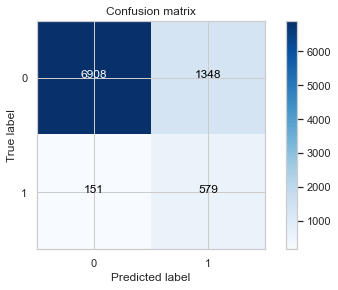

In [102]:
get_svm_model_stats(x_train, x_test, y_train, y_test,"linear")

> <span style='color:blue'>Model selected - RBF and accuracy score is 87.0</span>

------ 

### SVM (Default)-rbf Model Stats Scores Summary : 

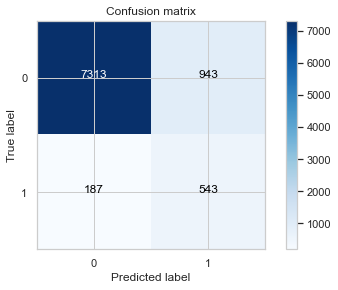

In [103]:
get_svm_model_stats(x_train,x_test, y_train, y_test,"rbf")

**Observations:** 
- The non-linear model gives approx. 87% accuracy
- Thus, going forward, let's choose hyperparameters corresponding to non-linear models

### 4.3.3: Randomized Search: Hyperparameter Tuning
Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [104]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-1,1e-2, 1e-3, 1e-4], 'C': [1, 10, 100, 1000]}]

# specify model
model = svm.SVC(kernel="rbf")

# set up RandomizedSearchCV()
model_cv_svm = RandomizedSearchCV(estimator = model, 
                        param_distributions = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv_svm.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
                   estimator=SVC(), n_jobs=-1,
                   param_distributions=[{'C': [1, 10, 100, 1000],
                                         'gamma': [0.1, 0.01, 0.001, 0.0001]}],
                   return_train_score=True, scoring='accuracy', verbose=1)

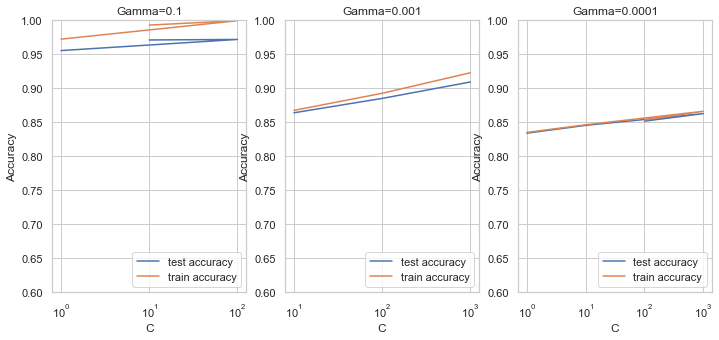

In [157]:
# cv results
svm_cv_results = pd.DataFrame(model_cv_svm.cv_results_)
svm_cv_results['param_C'] = svm_cv_results['param_C'].astype('int')
gamma=[1e-1,1e-2, 1e-3, 1e-4]
plt.figure(figsize=(16,5))
plt.subplot(141)
display_hyper_stats(svm_cv_results,gamma[0])
plt.subplot(142)
display_hyper_stats(svm_cv_results,gamma[2])
plt.subplot(143)
display_hyper_stats(svm_cv_results,gamma[3])
plt.show()

###### Observations:

- Non-linear models (high gamma) are performing better than the linear ones

- At any value of gamma, a high value of C leads to better performance

- This suggests that the problem and the data is inherently non-linear in nature, and a complex model will outperform simple, linear models in this case


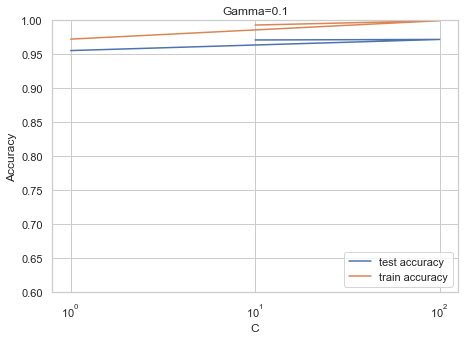

In [159]:
plt.figure(figsize=(16,5))
plt.subplot(121)
display_hyper_stats(svm_cv_results,gamma[0])

In [107]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv_svm.best_score_
best_hyperparams = model_cv_svm.best_params_

log("The best test score is {0} corresponding to hyperparameters {1}".format(round(best_score,2), best_hyperparams))

> <span style='color:blue'>The best test score is 0.97 corresponding to hyperparameters {'gamma': 0.1, 'C': 100}</span>

**Analysis:** The plots above show some useful insights:

- Looking at above curves and values , model with gamma=0.1 seems to be overfitting and should not be used

- Model selected with best value as 'C': 100, 'gamma': 0.1 but this model also seems to be overfitting

- But model selected with value 'C': 10, 'gamma': 0.1 should produce better results

- We will be selecting these values for final modelling

### 4.3.4: Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.


In [108]:
# model with optimal hyperparameters
final_svm_model = svm.SVC(C=10, gamma=0.1, kernel="rbf")

final_svm_model.fit(x_train, y_train)
y_pred = final_svm_model.predict(x_test)

# metrics
log("Max accuracy with SVM (rbf) is "+str(round(metrics.accuracy_score(y_test, y_pred),2)))

> <span style='color:blue'>Max accuracy with SVM (rbf) is 0.92</span>

------ 

### SVM( rfb ) [Hyper] Model Stats Scores Summary : 

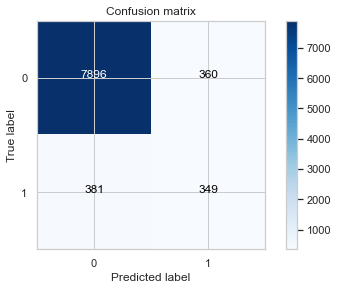

,Model,Accuracy,Precision,Recall,AUC,F1
0,SVM( rfb ) [Hyper],0.92,0.48,0.49,0.72,0.49


In [109]:
print_model_metrics(y_test, y_pred,"SVM( rfb ) [Hyper]")

### 4.4 Tree Model Regression

**Lets first fit a random forest model with default hyperparameters**

In [110]:
telecom_tree_df = base_df_final.copy()

In [111]:
x_train, x_test, y_train, y_test = get_regression_data(telecom_tree_df)

> <span style='color:blue'>Scaling the data ....</span>

> <span style='color:blue'>Shape of train datatset before : (20967, 79)</span>

> <span style='color:blue'>Percentage of Churned customer data : 8.12</span>

> <span style='color:blue'>Applying SMOTE to normalize imbalance ....</span>

> <span style='color:blue'>Shape of train datatset after SMOTE : (38528, 79)</span>

> <span style='color:blue'>Shape of train datatset after PCA : (38528, 60)</span>

In [112]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [113]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [114]:
# Making predictions
predictions = rfc.predict(x_test)

------ 

### RandomForest (Default) Model Stats Scores Summary : 

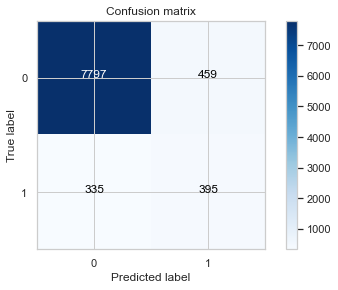

,Model,Accuracy,Precision,Recall,AUC,F1
0,RandomForest (Default),0.91,0.54,0.46,0.74,0.50


In [115]:
print_model_metrics(y_test,predictions,"RandomForest (Default)")

**We will now tune the hyperparameters to improve the performance of this model**

### 4.4.2 : HyperParameter Tuning

In [116]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report


def tune_hyperparameter(parameters,x_train,y_train,n_folds = 5,max_depth=0):
    
    if(max_depth==0):
        rf = RandomForestClassifier()
    else :
        rf = RandomForestClassifier(max_depth=max_depth)
        
    rf = RandomizedSearchCV(rf, parameters, cv=n_folds,n_jobs = -1, scoring="accuracy",return_train_score=True)
    rf.fit(x_train, y_train)
    scores = rf.cv_results_

    for key in parameters.keys():
        hyperparameters = key
        break

    # plotting accuracies for parameters
    plt.figure(figsize=(16,5))
    plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
    plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
    plt.xlabel(hyperparameters)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

### 4.4.3: Tuning max_depth
Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

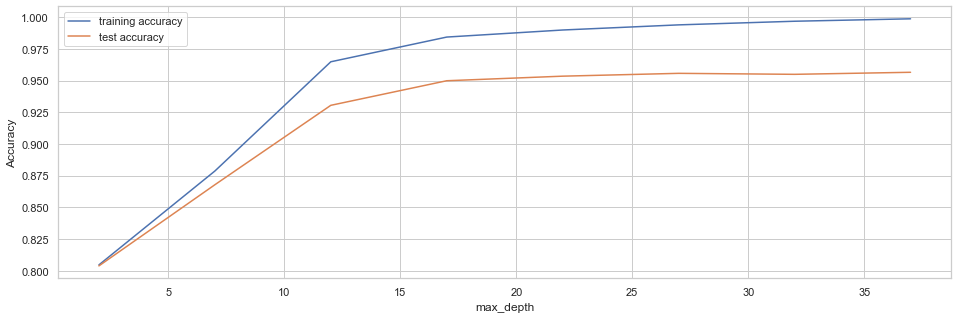

In [117]:
# parameters to build the model on
parameters = {'max_depth': range(2, 40, 5)}
tune_hyperparameter(parameters,x_train,y_train)

**Observations:** 

- As the value of max_depth is increasing, both train & test accuracy scores increase until a point and then stagnate

- The ensemble tries to overfit as we increase the max_depth. Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest

- 12 and 18 value have peek convergens and can be used for RandomizedSearchCV

### 4.4.4: Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

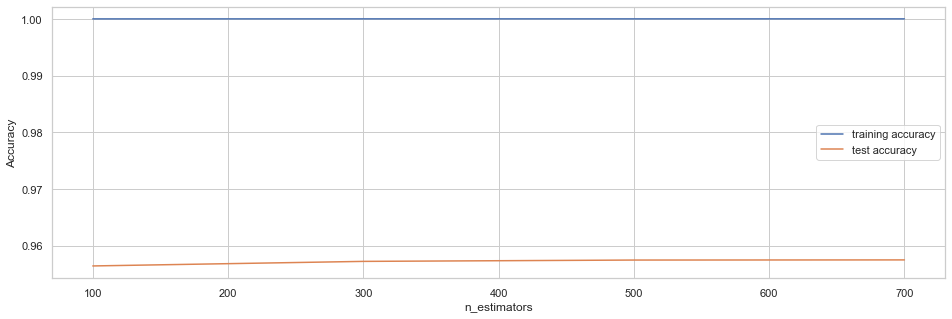

In [118]:
# parameters to build the model on
parameters = {'n_estimators': range(100, 500, 200)}
tune_hyperparameter(parameters,x_train,y_train)

**Observation:** 

- Accuracy Score is almost the same with very low dip throught the range. 
- We will use 200 for RandomizedSearch

### 4.4.5: Tuning max_features

Let's see how the model performance varies with max_features, which is the maximum numbre of features considered for splitting at a node.

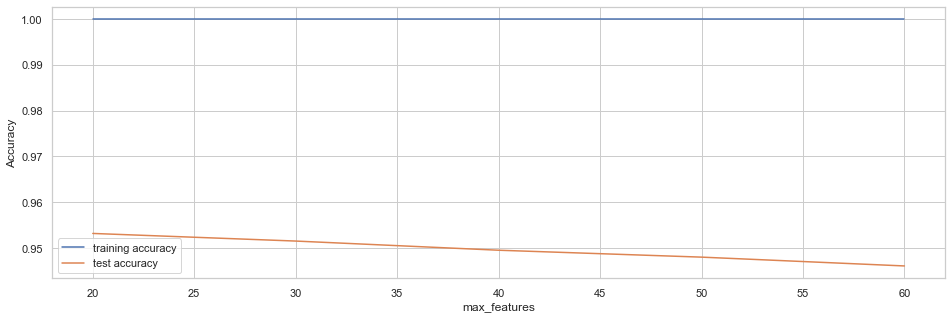

In [119]:
# parameters to build the model on
parameters = {'max_features': [20,30,40,50,60]}
tune_hyperparameter(parameters,x_train,y_train,4)

**Observations:**

- The accuracy on training dataset seems to be stable
- The test accuracy seems to decrease post 40 features, hence we will use max features as 40

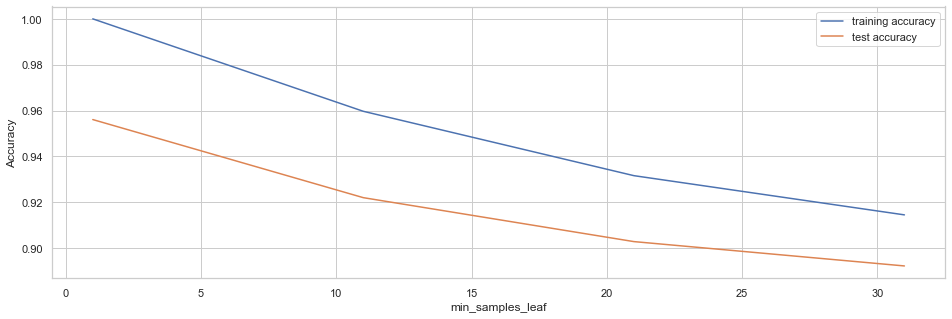

In [120]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 40, 10)}
tune_hyperparameter(parameters,x_train,y_train)

**Observations:** 

- The model starts to overfit as the value of min_samples_leaf decreases
- 10 to 20 seems to be a good range and that will be used in RandomizedSearch

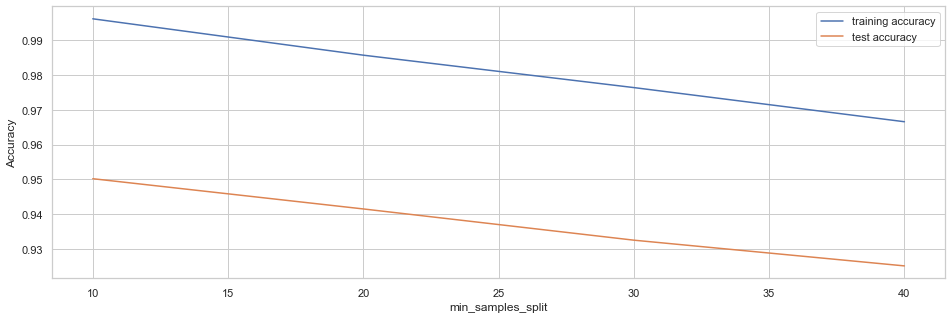

In [121]:
# parameters to build the model on
parameters = {'min_samples_split': range(10, 50, 10)}
tune_hyperparameter(parameters,x_train,y_train)

### 4.4.6: Randomized Search to Find Optimal Hyperparameters

- We can now find the optimal hyperparameters using RandomizedSearchCV

In [122]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [12,18],
    'n_estimators': [200],
    'max_features': [40],
    'min_samples_leaf': [10,20],
    'min_samples_split': [10,20,30]
}
# Create a based model
rf = RandomForestClassifier()

# Instantiate the randomizedsearch model
rf_grid_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,return_train_score=True)

In [123]:
# Fit the grid search to the data
rf_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [12, 18],
                                        'max_features': [40],
                                        'min_samples_leaf': [10, 20],
                                        'min_samples_split': [10, 20, 30],
                                        'n_estimators': [200]},
                   return_train_score=True, verbose=1)

In [124]:
# printing the optimal accuracy score and hyperparameters
log('We can get accuracy of '+str(round(rf_grid_search.best_score_,2))+' using '+str(rf_grid_search.best_params_))

> <span style='color:blue'>We can get accuracy of 0.93 using {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 40, 'max_depth': 18}</span>

We can get accuracy of 0.93 using {'max_depth': 18, 'max_features': 40, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 200}

In [125]:
log("Max accuracy with Random Forest classifier - "+str(round(rf_grid_search.best_score_,2)))

> <span style='color:blue'>Max accuracy with Random Forest classifier - 0.93</span>

### 4.4.7: Building and Evaluating the Final Model for Random Forest

- Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [126]:
rfc = RandomForestClassifier(max_depth=18,
                             max_features=40,
                             min_samples_leaf=10,
                             min_samples_split=20,
                             n_estimators=200,
                             n_jobs = -1)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=18, max_features=40, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=200, n_jobs=-1)

In [127]:
# Making predictions
predictions = rfc.predict(x_test)

------ 

### RandomForest (Hyper) Model Stats Scores Summary : 

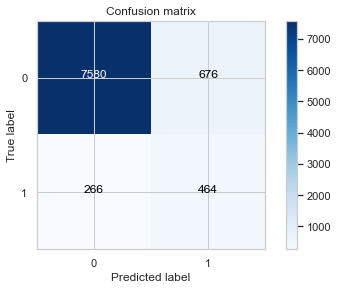

,Model,Accuracy,Precision,Recall,AUC,F1
0,RandomForest (Hyper),0.90,0.64,0.41,0.78,0.50


In [128]:
# Printing confusion matrix
print_model_metrics(y_test,predictions,'RandomForest (Hyper)')

### 4.5: XGBoost

- Let's finally try XGBoost. The hyperparameters are the same, some important ones being subsample, learning_rate, max_depth etc.

In [131]:
#pip install xgboost
#conda install -c conda-forge xgboost

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from imblearn.over_sampling import SMOTE

In [133]:
telecom_xgboost_df = base_df_final.copy()
x_train, x_test, y_train, y_test = get_regression_data(telecom_xgboost_df)

> <span style='color:blue'>Scaling the data ....</span>

> <span style='color:blue'>Shape of train datatset before : (20967, 79)</span>

> <span style='color:blue'>Percentage of Churned customer data : 8.12</span>

> <span style='color:blue'>Applying SMOTE to normalize imbalance ....</span>

> <span style='color:blue'>Shape of train datatset after SMOTE : (38528, 79)</span>

> <span style='color:blue'>Shape of train datatset after PCA : (38528, 60)</span>

In [134]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(x_train, y_train)

[00:45:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [135]:
# evaluate predictions
y_pred = model.predict(x_test)

------ 

### XGBoost (Default) Model Stats Scores Summary : 

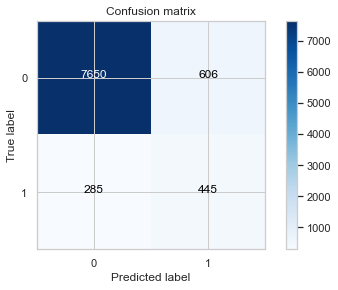

,Model,Accuracy,Precision,Recall,AUC,F1
0,XGBoost (Default),0.90,0.61,0.42,0.77,0.50


In [136]:
print_model_metrics(y_test, y_pred ,'XGBoost (Default)')

**Analysis:**

- The roc_auc in this case is about 77% with default hyperparameters

- Let's now try tuning the hyperparameters using k-fold CV. We'll then use RandomizedSearchCV to find the optimal values of hyperparameters

In [137]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up RandomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions = param_grid, 
                        scoring= 'accuracy', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)

In [138]:
# fit the model
model_cv.fit(x_train, y_train)       

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[00:48:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=2,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=200, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                             

In [139]:
# cv results
cv_results_xboost = pd.DataFrame(model_cv.cv_results_)
cv_results_xboost['param_learning_rate'] = cv_results_xboost['param_learning_rate'].astype('float')

In [140]:
# printing the optimal accuracy score and hyperparameters
log('We can get accuracy of **'+str(round(model_cv.best_score_,2))+'** using '+str(model_cv.best_params_))

> <span style='color:blue'>We can get accuracy of **0.88** using {'subsample': 0.4, 'learning_rate': 0.3}</span>

In [149]:
def plot_for_xboost(param_grid,cv_results):
    plt.figure(figsize=(18,5))
    for n, subsample in enumerate(param_grid['subsample']):
        # subplot 1/n
        plt.subplot(1,len(param_grid['subsample']), n+1)
        df = cv_results[cv_results['param_subsample']==subsample]

        plt.plot(df["param_learning_rate"], df["mean_test_score"])
        plt.plot(df["param_learning_rate"], df["mean_train_score"])
        plt.xlabel('learning_rate')
        plt.ylabel('AUC')
        plt.title("subsample={0}".format(subsample))
        plt.ylim([0.60, 1])
        plt.legend(['test score', 'train score'], loc='lower right')
        plt.xscale('log')

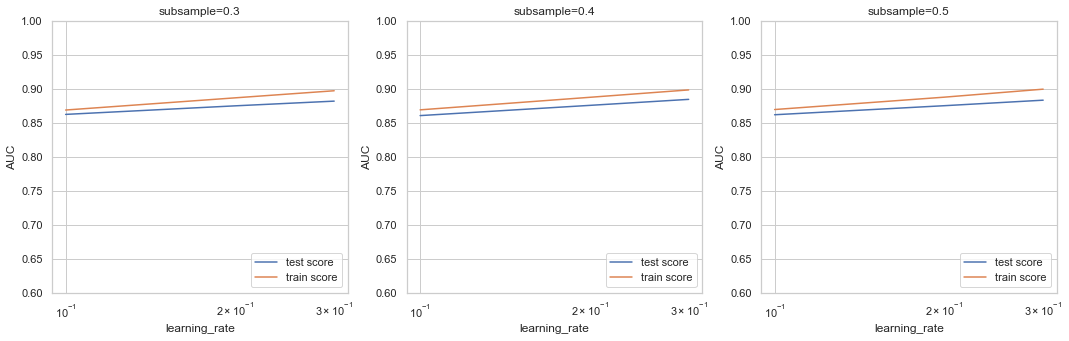

In [150]:
param_grid1 = {'learning_rate': [0.1,0.2,0.3], 'subsample': [0.3,0.4,0.5]}  
plot_for_xboost(param_grid1,cv_results_xboost)

**Analysis:** 
    
- The results show that a subsample size of 0.5 and learning_rate of about 0.3 seems optimal. Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters)

- Lets build the final model with the chosen hyperparameters

In [155]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.3,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.5,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(max_depth=2, n_estimators=200)
model.fit(x_train, y_train)

[02:08:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [152]:
# predict
y_pred = model.predict(x_test)

------ 

### XGBoost (Hyper Tuned) Model Stats Scores Summary : 

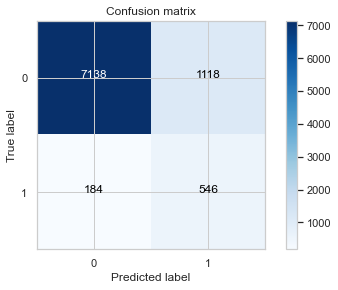

,Model,Accuracy,Precision,Recall,AUC,F1
0,XGBoost (Hyper Tuned),0.86,0.75,0.33,0.81,0.46


In [153]:
print_model_metrics(y_test, y_pred,'XGBoost (Hyper Tuned)')

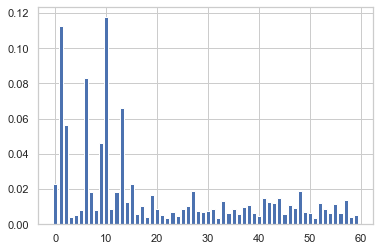

In [154]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

------ 

### Important features ...

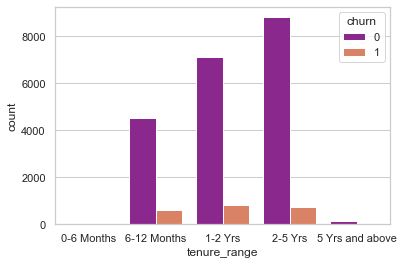

,PC1,PC2,PC3,Feature
0,0.00,0.29,0.15,arpu_8
1,-0.11,0.11,0.15,onnet_mou_8
2,-0.10,0.20,0.11,offnet_mou_8
3,-0.01,0.05,0.01,roam_ic_mou_8
4,-0.02,0.07,0.03,roam_og_mou_8
5,-0.03,0.10,0.02,loc_og_t2t_mou_8
6,-0.03,0.18,-0.03,loc_og_t2m_mou_8
7,0.01,0.11,-0.09,loc_og_t2f_mou_8
8,-0.01,0.02,0.08,loc_og_t2c_mou_8
9,-0.11,0.07,0.16,std_og_t2t_mou_8


In [147]:
header("Important features ...")
plt.figure(figsize=(6,4))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data,palette=("plasma"))
plt.show()


col = list(X_scaled.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(15)

## Part 5: Conclusion: 

### 5.1 Model Insights:

In [148]:
consolidate_summary.head(10)

,Model,Accuracy,Precision,Recall,AUC,F1
0,SVM (Default)-linear,0.83,0.79,0.30,0.81,0.44
1,SVM (Default)-rbf,0.87,0.74,0.37,0.81,0.49
2,SVM( rfb ) [Hyper],0.92,0.48,0.49,0.72,0.49
3,RandomForest (Default),0.91,0.54,0.46,0.74,0.50
4,RandomForest (Hyper),0.90,0.64,0.41,0.78,0.50
5,XGBoost (Default),0.90,0.61,0.42,0.77,0.50
6,XGBoost (Hyper Tuned),0.86,0.75,0.33,0.81,0.46


- SVM with tuned hyperparameters produce best result on this dataset with 0.92 accuracy

- Random forest also produce good accuracy with 0.91 (default overfit model) and 0.90 with tuned hyperparameters

- XGBoost also produce apt accuracy of 0.90 (default overfit model) and 0.86 with tuned hyperparameters

- **As per our analysis SVM and Random forest produce best accuracy and models can be selected to predict churn data for future dataset or production**

### 5.2 Business Recommendations: 

#### Business Insights: Based on high-value customers

- Less number of **high value customers** are churning 

- For last **6 months** no new high valued customer has been onboarded which can be concerning

- Customers with **less than 4 years of tenure** are having high likelihood to churn and company should take steps to retain them

- **Average Revenue Per User** seems to be most important feature in determining churn prediction

- **Incoming and Outgoing Calls on romaing** for 8th month are strong indicators of churn behaviour

- **Local Outgoing calls made to landline, fixedline, mobile and call center** provide as a strong indicator of churn behaviour

- **Better 2G/3G area coverage** where 2G/3G services are not good, is strong indicator of churn behaviour